**1. Giới thiệu tổng quát về đề tài**

Bài nghiên cứu này được thực hiện nhằm xây dựng và quản lý danh mục đầu tư hiệu quả trên thị trường chứng khoán Việt Nam, đặc biệt từ 3 cổ phiếu trong nhóm VN30 là các mã FPT, HPG và VNM. Mục tiêu là thực hiện các thông kê mô tả cơ bản, áp dụng các phương pháp phân tích tài chính để tối ưu hóa danh mục đầu tư, đồng thời tính toán các chỉ số rủi ro như Value at Risk (VaR), Expected Shortfall (ES) và ước lượng sự biến động (volatility) thông qua các mô hình GARCH(1,1) và EWMA.

Key word: FPT, VNM, HPG, VN30, Var, ES, EWMA và GARCH(1,1).



**2. Phương pháp**

Trong nghiên cứu này, tôi sử dụng các phương pháp phân tích tài chính để xây dựng danh mục đầu tư tối ưu và tính toán các chỉ số rủi ro cho ba cổ phiếu từ nhóm VN30 trên thị trường chứng khoán Việt Nam (VNM, FPT, HPG). Các bước thực hiện bao gồm:

+ Thu thập dữ liệu trong 5 năm qua.

+ Phân tích thống kê cơ bản và kiểm tra tính phân phối chuẩn.

+ Vẽ các biểu đồ như giá và lợi suất theo thời gian, histogram, Q-Q plot và box plot.

+ Tính toán các chỉ số rủi ro như Value at Risk (VaR) qua ba phương pháp: Historical Simulation, Parametric VaR và EWMA VaR.

+ Tính toán Expected Shortfall (ES).

+ Thực hiện Backtesting mô hình VaR bằng các phương pháp: Violation Ratio, Kupiec Test và Christoffersen test

+ Phân tích tương quan giữa các cổ phiếu bằng: ma trận tương quan, Rolling correlation với các cửa số( 10,20,30 ngày) và vẽ biểu đồ heat map tương quan.

+ Ước lượng và dự báo volatility bằng: mô hình GARCH(1,1), EWMA.

+ Tối ưu danh mục đầu tư theo phương pháp Markowitz, phân tích các kịch bản (Scenario Analysis) và đề xuất các chiến lược quản trị rủi ro hiệu quả.

**3. Kết quả**

**Câu 1: Thu thập dữ liệu**
- Dùng gói **vnstock3** để thu thập dữ liệu.
- Chọn 3 mã cổ phiếu là **FPT**, **HPG** và **VNM** từ VN30.



In [99]:
# Nạp thư viện để sử dụng
!pip install vnstock3
from vnstock3 import Vnstock
import pandas as pd

# Định nghĩa biến Vnstock và chọn nguồn dữ liệu
stock = Vnstock()

# Danh sách mã cổ phiếu
stocks = ['FPT', 'HPG', 'VNM']

# Tạo DataFrame rỗng để lưu trữ kết quả
data = pd.DataFrame()

# Lặp qua từng mã cổ phiếu và lấy dữ liệu
for symbol in stocks:
    # Lấy dữ liệu lịch sử cho mã cổ phiếu
    stock_data = stock.stock(symbol=symbol, source='VCI').quote.history(start='2019-11-23', end='2024-11-23', interval='1D')

    # Chuyển đổi cột 'time' thành định dạng DateTime
    stock_data['time'] = pd.to_datetime(stock_data['time'])

    # Chỉ lấy cột 'time' và 'close', đổi tên cột 'close' thành tên mã cổ phiếu
    stock_data = stock_data[['time', 'close']].rename(columns={'close': f'{symbol}.Close'})

    # Đặt cột 'time' làm index
    stock_data = stock_data.set_index('time')

    # Gộp dữ liệu vào bảng tổng
    if data.empty:
        data = stock_data
    else:
        data = pd.concat([data, stock_data], axis=1)

# Hiển thị dữ liệu kết quả
data

2024-12-13 04:28:02 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-12-13 04:28:05 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-12-13 04:28:09 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,FPT.Close,HPG.Close,VNM.Close
time,,,
2019-11-25,23.96,9.21,81.25
2019-11-26,24.18,9.37,81.32
2019-11-27,24.13,9.35,80.72
2019-11-28,23.71,9.35,80.72
2019-11-29,23.88,9.46,80.32
...,...,...,...
2024-11-18,133.08,25.80,63.20
2024-11-19,129.10,25.45,63.00
2024-11-20,131.49,25.60,63.60


**Câu 2: Phân tích thống kê mô tả**

**2.1. Tính toán lợi suất bao gồm: lợi suất bình thường và lợi suất log.**




In [100]:
# Nạp thư viện cần thiết
import numpy as np

# Tạo DataFrame rỗng để lưu trữ kết quả tính toán tỉ suất sinh lợi
returns_data = pd.DataFrame()

# Danh sách mã cổ phiếu
stocks = ['FPT', 'HPG', 'VNM']

# Lặp qua từng mã cổ phiếu để tính toán
for symbol in stocks:
    # Tính tỉ suất sinh lợi bình thường (Simple Return)
    returns_data[f'{symbol}.Simple_Return'] = data[f'{symbol}.Close'].pct_change()

    # Tính tỉ suất sinh lợi log (Log Return)
    returns_data[f'{symbol}.Log_Return'] = np.log(data[f'{symbol}.Close'] / data[f'{symbol}.Close'].shift(1))

# Thêm cột 'time' từ index của DataFrame 'data'
returns_data.index = data.index

# Hiển thị dữ liệu kết quả
returns_data

,FPT.Simple_Return,FPT.Log_Return,HPG.Simple_Return,HPG.Log_Return,VNM.Simple_Return,VNM.Log_Return
time,,,,,,
2019-11-25,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26,0.009182,0.009140,0.017372,0.017223,0.000862,0.000861
2019-11-27,-0.002068,-0.002070,-0.002134,-0.002137,-0.007378,-0.007406
2019-11-28,-0.017406,-0.017559,0.000000,0.000000,0.000000,0.000000
2019-11-29,0.007170,0.007144,0.011765,0.011696,-0.004955,-0.004968
...,...,...,...,...,...,...
2024-11-18,0.000752,0.000752,-0.003861,-0.003868,-0.007849,-0.007880
2024-11-19,-0.029907,-0.030363,-0.013566,-0.013659,-0.003165,-0.003170
2024-11-20,0.018513,0.018344,0.005894,0.005877,0.009524,0.009479


**2.2. Tính toán chỉ số thống kê cơ bản như là : Mean, variance, skewness và kurtosis.**

In [101]:
from scipy.stats import kurtosis, skew

# Tạo DataFrame để lưu kết quả thống kê
stats_summary = []

# Lọc các cột Log Return từ biến `returns_data`
log_return_columns = [col for col in returns_data.columns if '.Log_Return' in col]

# Lặp qua từng mã cổ phiếu để tính toán
for col in log_return_columns:
    # Lấy dữ liệu tỉ suất sinh lợi log từ `returns_data`
    log_returns = returns_data[col].dropna()

    # Tính các chỉ số thống kê cơ bản
    mean = log_returns.mean()
    variance = log_returns.var()
    skewness = skew(log_returns)
    kurt = kurtosis(log_returns)  # Fisher kurtosis (mặc định)

    # Thêm kết quả vào danh sách
    stats_summary.append({
        'Ticker': col.split('.')[0],  # Lấy tên mã cổ phiếu từ cột
        'Mean': mean,
        'Variance': variance,
        'Skewness': skewness,
        'Kurtosis': kurt
    })

# Chuyển đổi danh sách kết quả thành DataFrame
stats_summary = pd.DataFrame(stats_summary)

# Hiển thị kết quả
stats_summary

,Ticker,Mean,Variance,Skewness,Kurtosis
0,FPT,0.001372,0.000305,-0.126820,3.220722
1,HPG,0.000834,0.000496,-0.139131,1.609864
2,VNM,-0.000187,0.000228,0.148851,4.298959


Diễn giải
+ FPT và HPG có mean dương còn VNM có mean âm.

+ HPG có Variance lớn nhất trong ba mã cổ phiếu.

+ FPT và HGP có Skewness âm nên lệch trái còn VNM thì lệch phải.

+ FPT có chỉ số Kurtosis gần bằng độ lệch chuẩn (Kurtosis=3.2), HPG có độ nhọn vừa phải và phẳng hơn(Kurtosis=1.6) còn VNM có độ nhọn lớn hơn phân phối chuẩn nên sẽ có nhiều giá trị cực đại hơn(Kurtosis=4.32)


**2.3. Kiểm định tính phân phối chuẩn của ba mã cổ phiếu trên.**

Dùng kiểm định **Kolmogorov-Smirnov Test**



In [102]:
from scipy.stats import ks_2samp

# Danh sách các mã cổ phiếu
stocks = ['FPT-log_return', 'HPG-log_return', 'VNM-log_return']

# Tạo dữ liệu giả
np.random.seed(0)  # Để tạo dữ liệu ngẫu nhiên có thể tái tạo
returns = pd.DataFrame({
    stock: np.random.normal(loc=0, scale=1, size=1000)  # Tạo dữ liệu ngẫu nhiên với phân phối chuẩn
    for stock in stocks
})

# Sử dụng seed = 1, để kết quả không bị thay đổi mỗi lần chạy
np.random.seed(1)

# Thực hiện kiểm định Kolmogorov-Smirnov cho từng mã cổ phiếu
for stock in stocks:
    # Lấy dữ liệu tỉ suất log cho từng mã, loại bỏ giá trị NaN (returns cần có dữ liệu có sẵn)
    stock_returns = returns[stock].dropna()

    # Mô phỏng phân phối chuẩn
    simulated_normal = np.random.normal(
        loc=stock_returns.mean(),
        scale=stock_returns.std(),
        size=len(stock_returns)
    )

    # Thực hiện kiểm định Kolmogorov-Smirnov
    ks_stat, ks_p_value = ks_2samp(stock_returns, simulated_normal)

    # In p-value và kết luận
    if ks_p_value >= 0.05:
        conclusion = "tuân theo phân phối chuẩn"
    else:
        conclusion = "không tuân theo phân phối chuẩn"

    print(f"{stock}: p-value = {ks_p_value:.4f}, Kết luận: Cổ phiếu {conclusion}")

FPT-log_return: p-value = 0.3137, Kết luận: Cổ phiếu tuân theo phân phối chuẩn
HPG-log_return: p-value = 0.7947, Kết luận: Cổ phiếu tuân theo phân phối chuẩn
VNM-log_return: p-value = 0.5363, Kết luận: Cổ phiếu tuân theo phân phối chuẩn


Nhận xét: Kết quả là tỉ suất sinh lời theo (log) của ba mã cổ phiếu là FPT, HPG và VNM đều tuân theo phân phối chuẩn

**2.4. Vẽ các biểu đồ**

**2.4.1. Biểu đồ giá theo thời gian của ba mã cổ phiếu.**





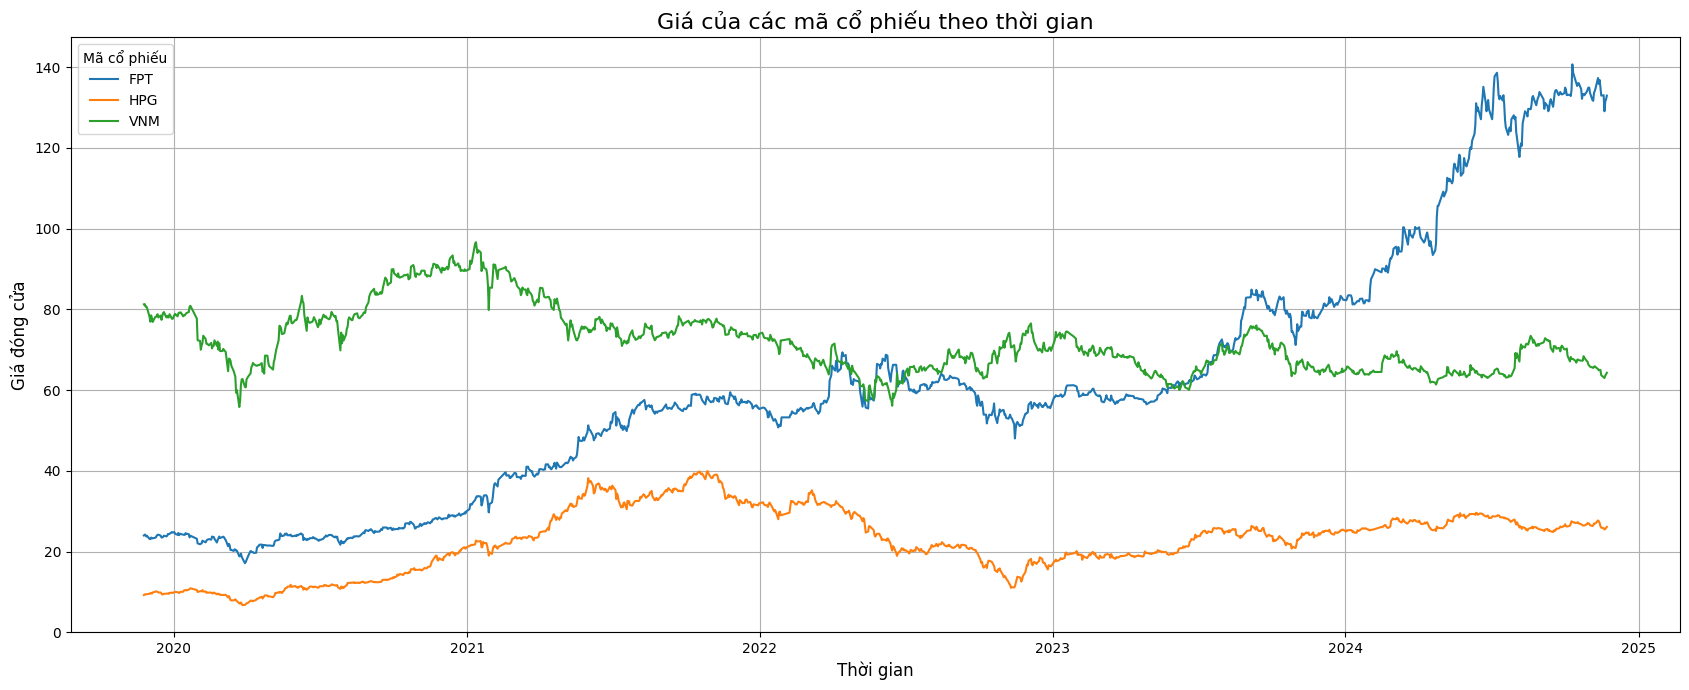

In [103]:
import matplotlib.pyplot as plt

# Lựa chọn các cột giá đóng cửa (Close)
close_prices = data[['FPT.Close', 'HPG.Close', 'VNM.Close']]

# Vẽ biểu đồ
plt.figure(figsize=(17, 7))
for symbol in close_prices.columns:
    # Trích tên mã cổ phiếu từ cột (bỏ phần '.Close')
    label = symbol.split('.')[0]
    plt.plot(close_prices.index, close_prices[symbol], label=label)

# Thiết lập tiêu đề và nhãn
plt.title('Giá của các mã cổ phiếu theo thời gian', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Giá đóng cửa', fontsize=12)
plt.legend(title="Mã cổ phiếu")
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Nhận xét:
+ Giá của cổ phiếu FPT có xu hướng tăng trong 5 năm trở lại đây.
+ Giá của cổ phiếu VNM di chuyển trong vùng giá từ 60 đến 100.
+ Giá của cổ phiếu HPG di chuyển trong vùng giá từ 15 đến 40.

**2.4.2. Biểu đồ lợi suất theo thời gian của ba mã cổ phiếu**


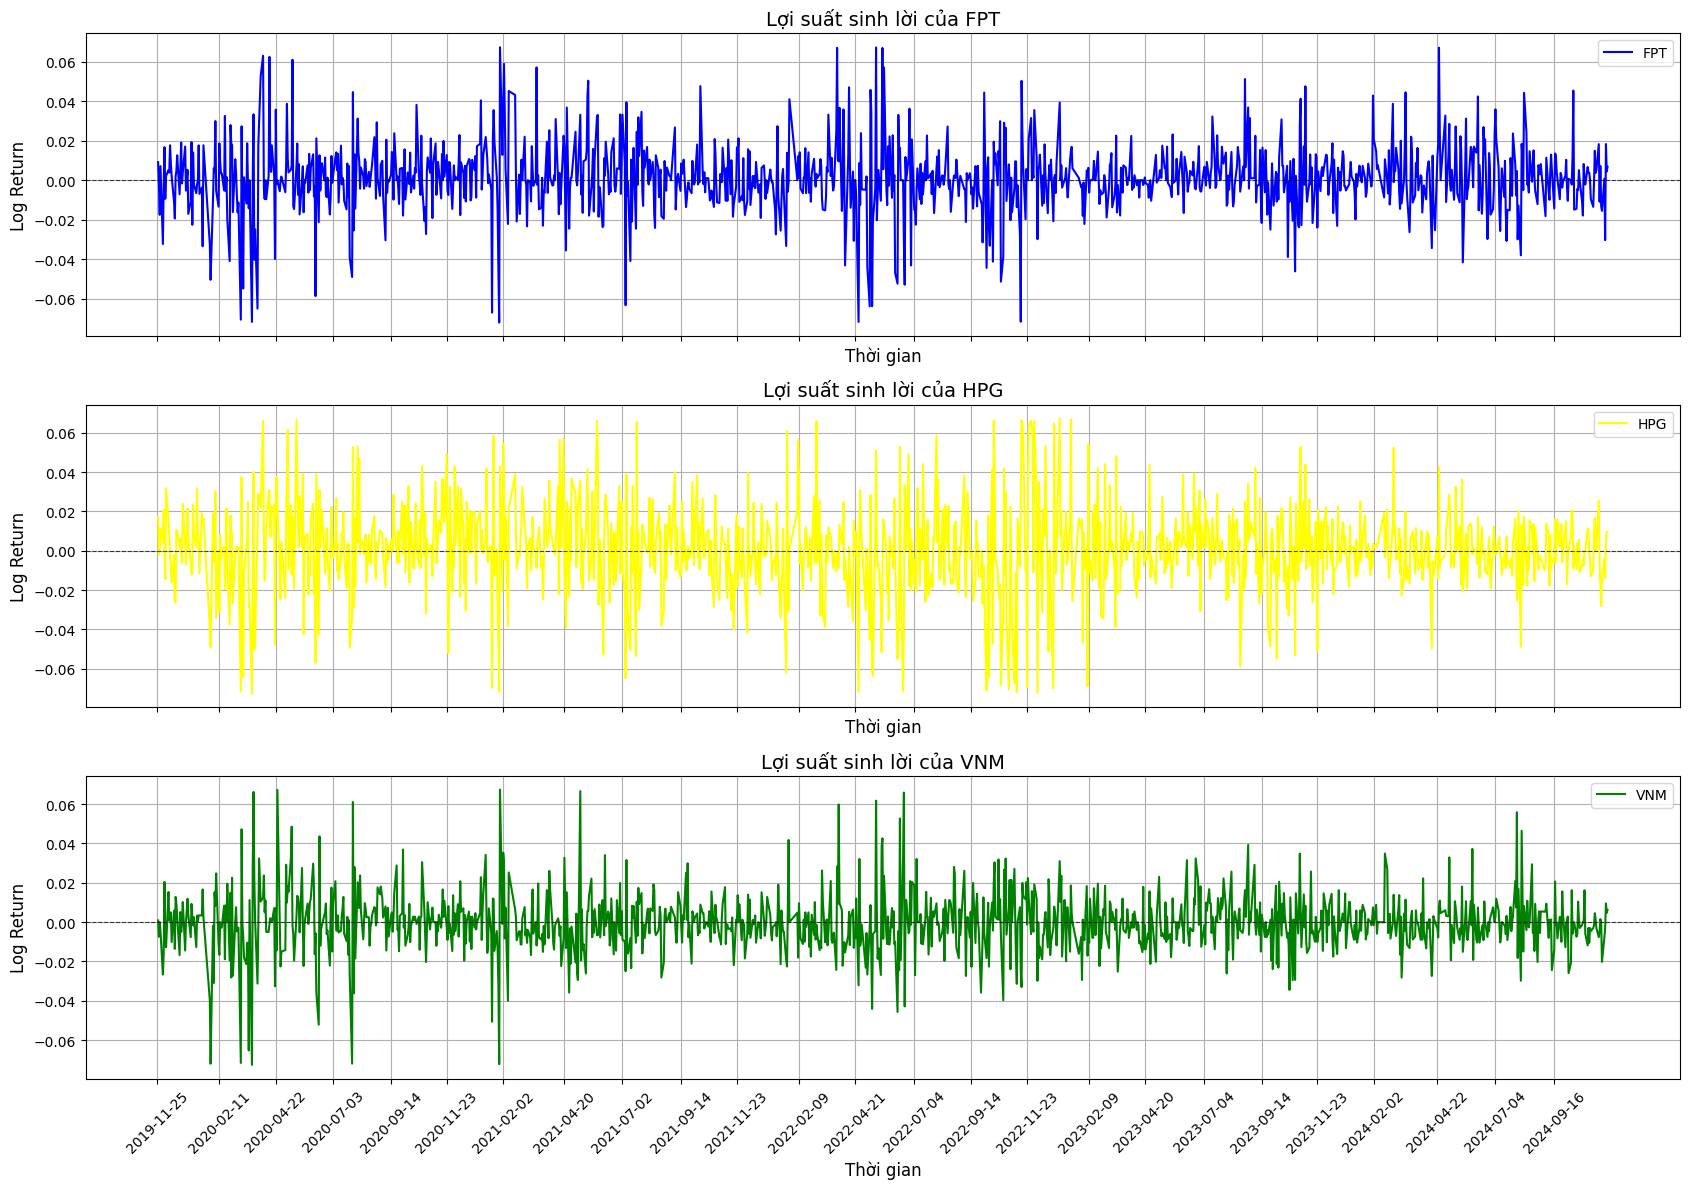

In [104]:
# Lọc các cột Log Return từ `returns_data`
log_returns = returns_data[[col for col in returns_data.columns if '.Log_Return' in col]]

# Thiết lập màu sắc cho từng mã cổ phiếu
colors = {'FPT': 'blue', 'HPG': 'yellow', 'VNM': 'green'}

# Vẽ biểu đồ riêng biệt cho từng mã cổ phiếu
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(17, 12), sharex=True)

for i, symbol in enumerate(['FPT', 'HPG', 'VNM']):
    col = f'{symbol}.Log_Return'  # Tên cột trong `returns_data`
    axes[i].plot(log_returns.index, log_returns[col], label=symbol, color=colors[symbol])
    axes[i].set_title(f'Lợi suất sinh lời của {symbol}', fontsize=14)
    axes[i].axhline(y=0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
    axes[i].set_ylabel('Log Return', fontsize=12)
    axes[i].legend()
    axes[i].grid(True)

    # Thêm nhãn trục x cho từng biểu đồ
    axes[i].set_xlabel('Thời gian', fontsize=12)

# Cập nhật trục x cho tất cả biểu đồ
for ax in axes:
    ax.tick_params(axis='x', rotation=45)  # Xoay nhãn trục x 45 độ
    ax.set_xticks(log_returns.index[::50])  # Lấy các mốc thời gian cách nhau 50
    ax.set_xticklabels(log_returns.index[::50].strftime('%Y-%m-%d'))  # Định dạng thời gian

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



**2.4.3. Biểu đồ Histogram lợi suất của ba mã cổ phiếu**

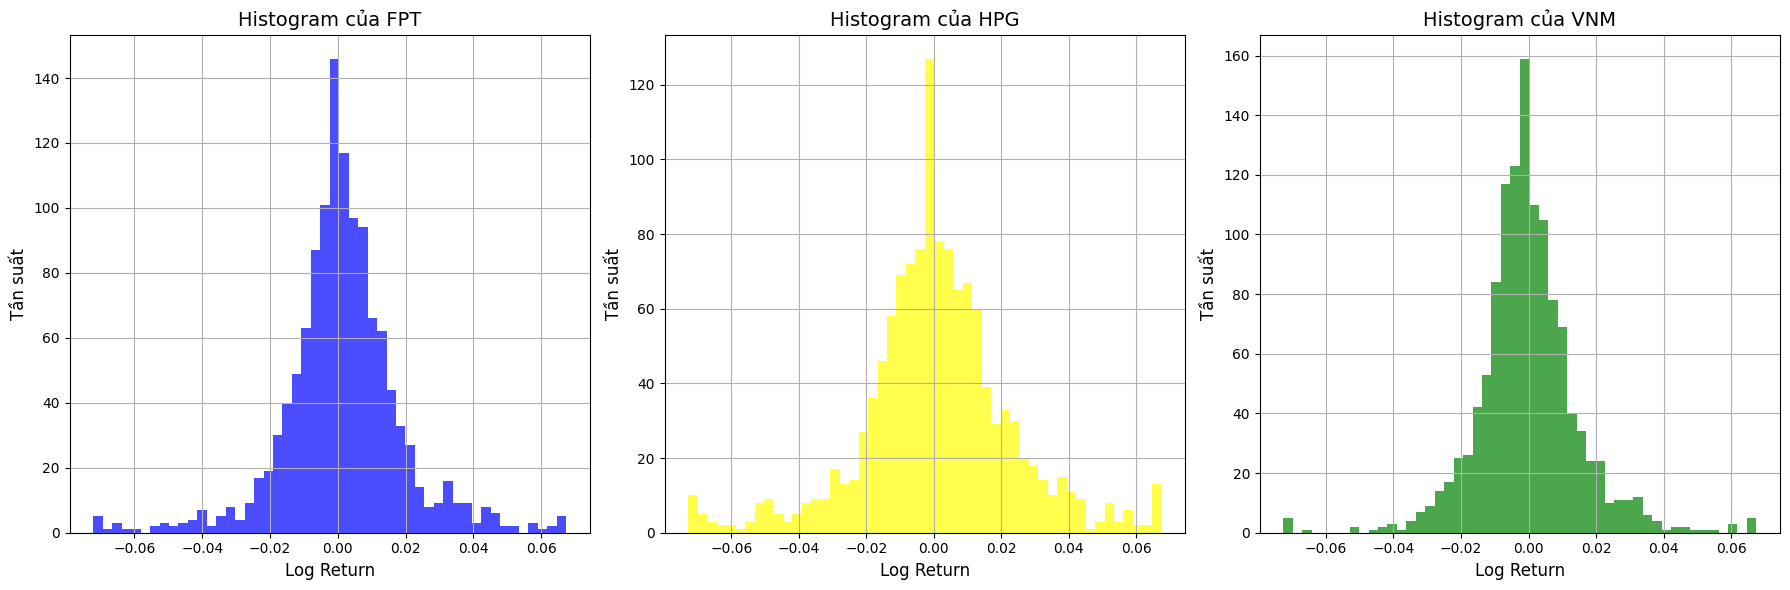

In [105]:
# Lọc các cột Log Return từ `returns`
log_returns = returns_data[['FPT.Log_Return', 'HPG.Log_Return', 'VNM.Log_Return']]

# Vẽ ba biểu đồ histogram trên một hàng
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 hàng, 3 cột

# Vẽ histogram cho FPT
axes[0].hist(log_returns['FPT.Log_Return'].dropna(), bins=50, alpha=0.7, color='blue')
axes[0].set_title('Histogram của FPT', fontsize=14)
axes[0].set_xlabel('Log Return', fontsize=12)
axes[0].set_ylabel('Tần suất', fontsize=12)
axes[0].grid(True)

# Vẽ histogram cho HPG
axes[1].hist(log_returns['HPG.Log_Return'].dropna(), bins=50, alpha=0.7, color='yellow')
axes[1].set_title('Histogram của HPG', fontsize=14)
axes[1].set_xlabel('Log Return', fontsize=12)
axes[1].set_ylabel('Tần suất', fontsize=12)
axes[1].grid(True)

# Vẽ histogram cho VNM
axes[2].hist(log_returns['VNM.Log_Return'].dropna(), bins=50, alpha=0.7, color='green')
axes[2].set_title('Histogram của VNM', fontsize=14)
axes[2].set_xlabel('Log Return', fontsize=12)
axes[2].set_ylabel('Tần suất', fontsize=12)
axes[2].grid(True)

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()


Nhận xét:

+ Phân bố lợi nhuận: Cả ba cổ phiếu FPT, HPG và VNM đều cho thấy phân bố lợi nhuận tương đối giống nhau, tập trung quanh một giá trị trung bình. Điều này có nghĩa là trong phần lớn thời gian, giá cổ phiếu của các công ty này biến động không quá mạnh.

+ Xu hướng chung: Cả ba biểu đồ đều có xu hướng lệch về phía bên phải, cho thấy trong khoảng thời gian được khảo sát, các cổ phiếu này có xu hướng tăng giá nhiều hơn so với giảm giá.

**2.4.4. Biểu đồ Q-Q Plot**

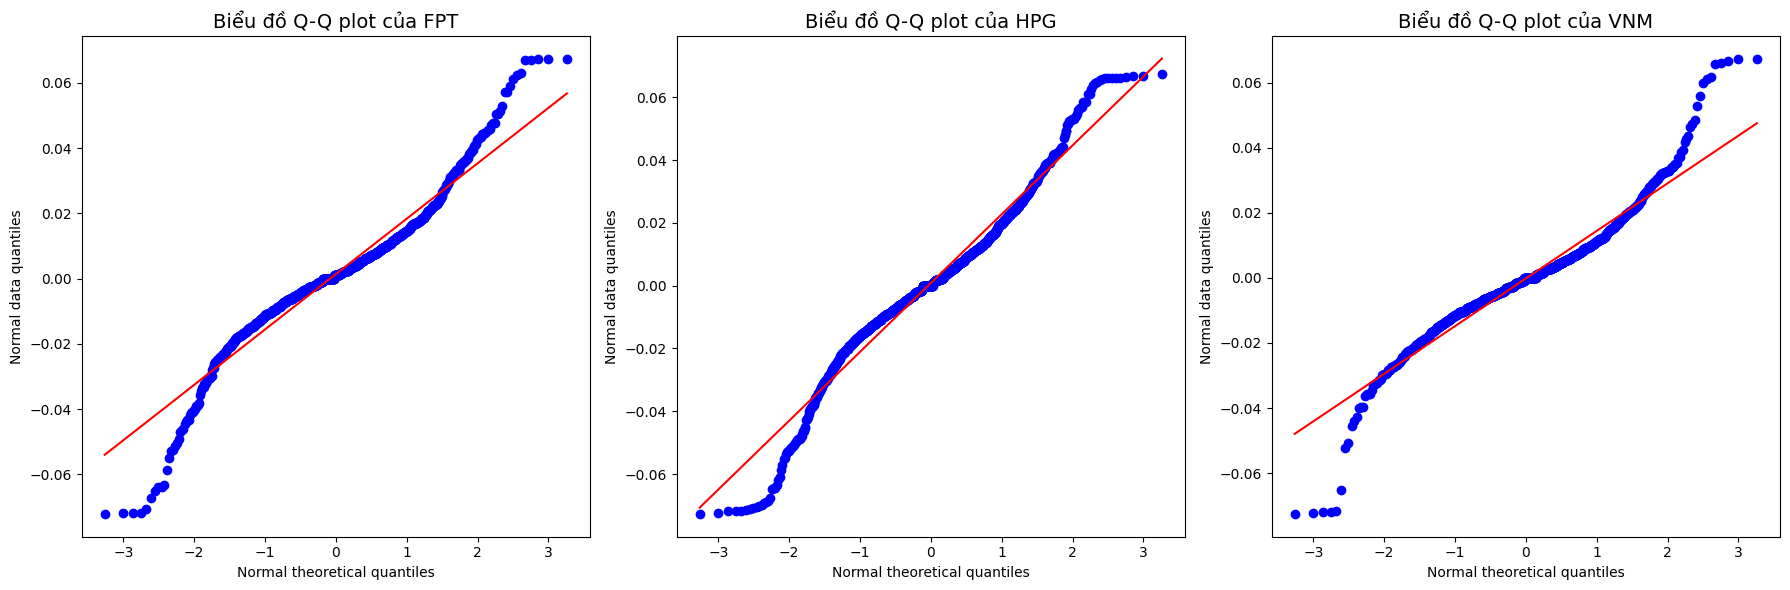

In [106]:
import scipy.stats as stats

# Vẽ ba biểu đồ Q-Q plot trên một hàng ngang
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 hàng, 3 cột

# Q-Q plot cho FPT
stats.probplot(log_returns['FPT.Log_Return'].dropna(), dist="norm", plot=axes[0])
axes[0].set_title('Biểu đồ Q-Q plot của FPT', fontsize=14)
axes[0].set_xlabel('Normal theoretical quantiles')
axes[0].set_ylabel('Normal data quantiles')

# Q-Q plot cho HPG
stats.probplot(log_returns['HPG.Log_Return'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title('Biểu đồ Q-Q plot của HPG', fontsize=14)
axes[1].set_xlabel('Normal theoretical quantiles')
axes[1].set_ylabel('Normal data quantiles')

# Q-Q plot cho VNM
stats.probplot(log_returns['VNM.Log_Return'].dropna(), dist="norm", plot=axes[2])
axes[2].set_title('Biểu đồ Q-Q plot của VNM', fontsize=14)
axes[2].set_xlabel('Normal theoretical quantiles')
axes[2].set_ylabel('Normal data quantiles')

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()


Nhận xét:

+ Dữ liệu của cả ba mã chứng khoán FPT, HPG và VNM đều có xu hướng tuân theo phân phối chuẩn.

+ FPT và HPG và VNM có một chút độ lệch hoặc đuôi dày nhẹ, nhưng nhìn chung vẫn khá gần với phân phối chuẩn.

**2.4.5. Biểu đồ Box Plot**

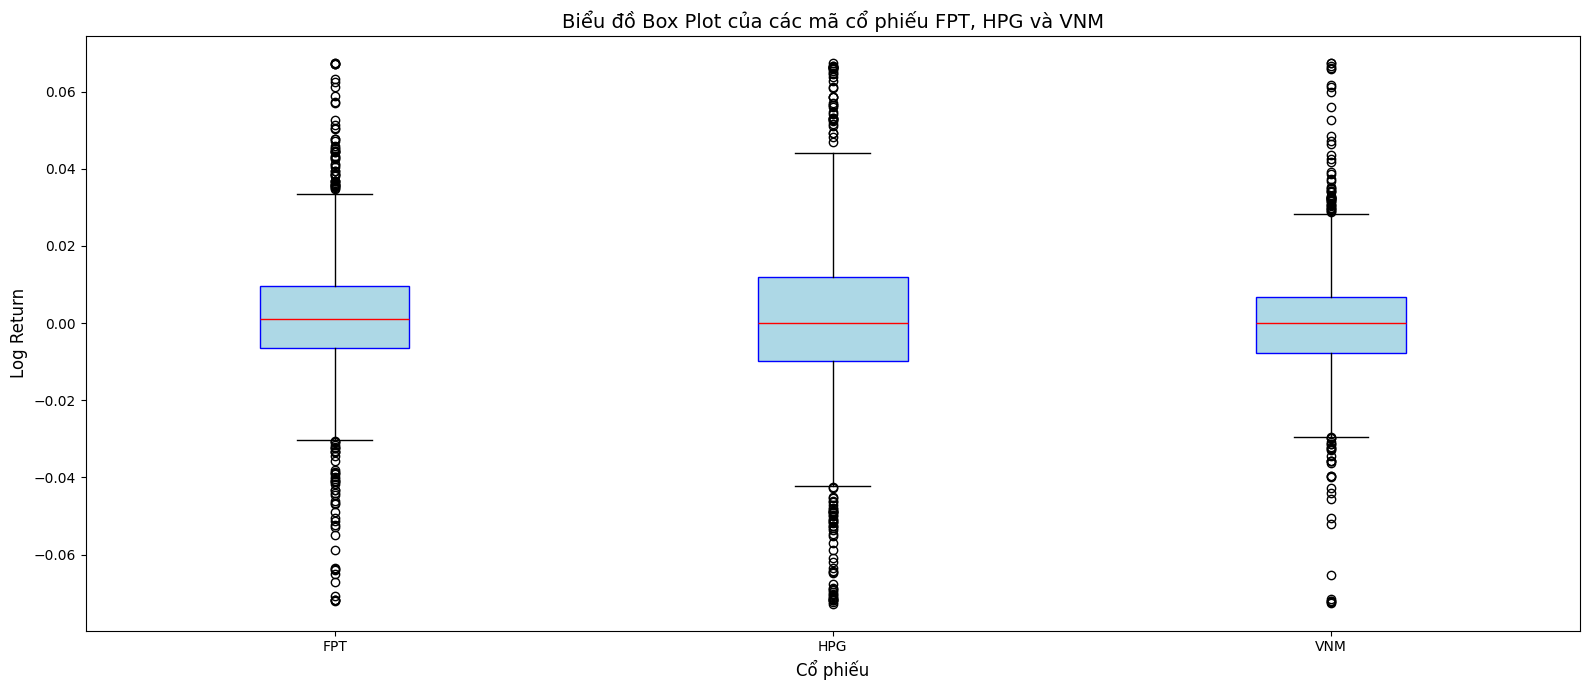

In [107]:
# Dữ liệu cho từng cổ phiếu
data_to_plot = [log_returns['FPT.Log_Return'].dropna(),
                log_returns['HPG.Log_Return'].dropna(),
                log_returns['VNM.Log_Return'].dropna()]

# Tạo một biểu đồ duy nhất với ba box plot
plt.figure(figsize=(16, 7))

# Vẽ Box Plot cho ba cổ phiếu
plt.boxplot(data_to_plot, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ Box Plot của các mã cổ phiếu FPT, HPG và VNM', fontsize=14)
plt.xlabel('Cổ phiếu', fontsize=12)
plt.ylabel('Log Return', fontsize=12)

# Đặt nhãn cho trục x (các cổ phiếu)
plt.xticks([1, 2, 3], ['FPT', 'HPG', 'VNM'])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Mở rộng: Biểu đồ các Outlier của ba mã cổ phiếu theo thời gian.

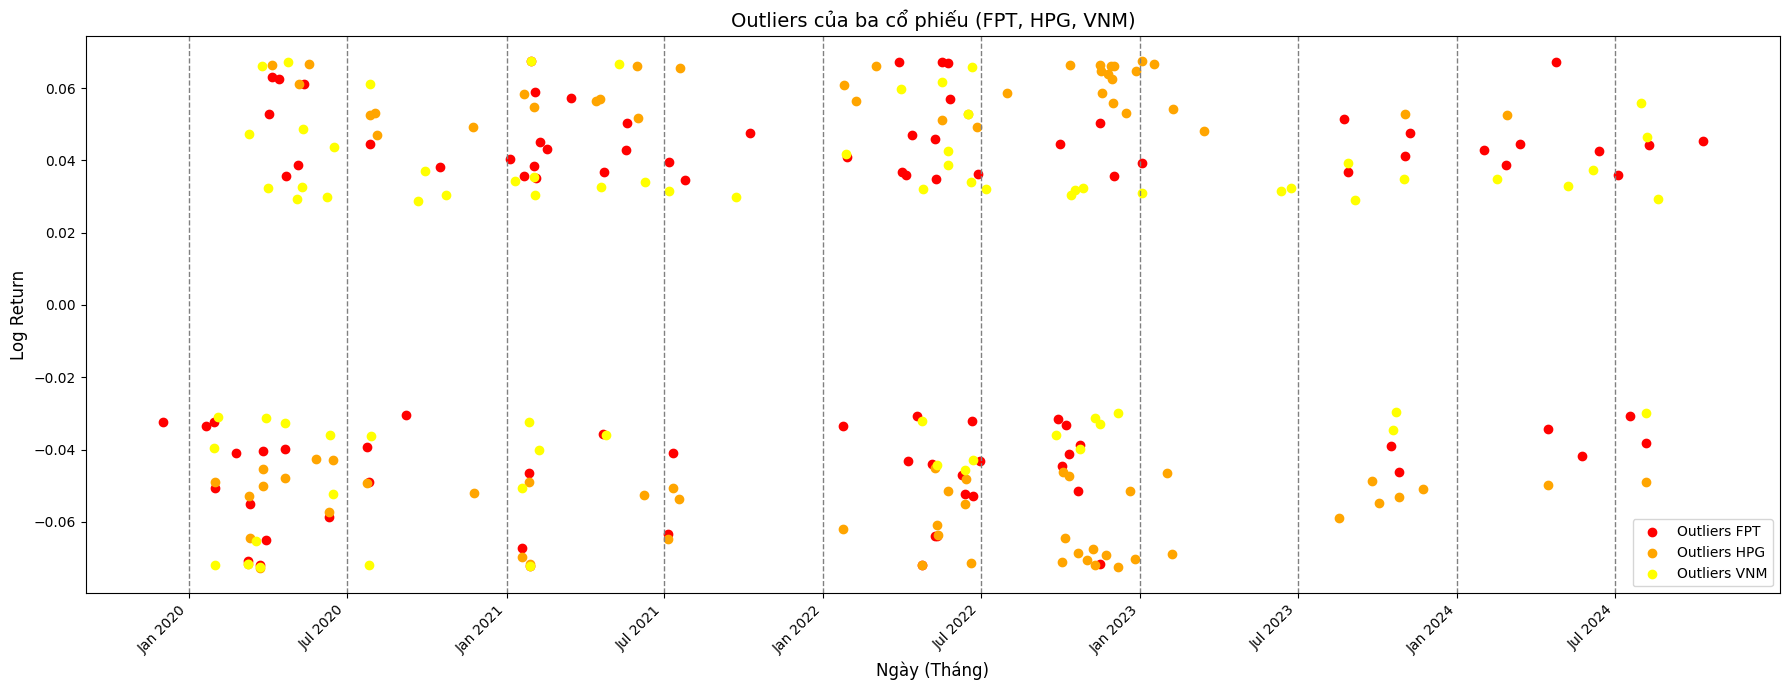

In [108]:
# Xác định outliers cho từng cổ phiếu
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Tính toán outliers và các giá trị ngưỡng cho từng cổ phiếu
outliers_FPT, lower_FPT, upper_FPT = detect_outliers(log_returns['FPT.Log_Return'].dropna())
outliers_HPG, lower_HPG, upper_HPG = detect_outliers(log_returns['HPG.Log_Return'].dropna())
outliers_VNM, lower_VNM, upper_VNM = detect_outliers(log_returns['VNM.Log_Return'].dropna())

# Tạo biểu đồ gộp 3 cổ phiếu vào một biểu đồ duy nhất
fig, ax = plt.subplots(figsize=(18, 7))

# Biểu đồ cho cổ phiếu FPT
ax.scatter(outliers_FPT.index, outliers_FPT, color='red', label='Outliers FPT')

# Biểu đồ cho cổ phiếu HPG
ax.scatter(outliers_HPG.index, outliers_HPG, color='orange', label='Outliers HPG')

# Biểu đồ cho cổ phiếu VNM
ax.scatter(outliers_VNM.index, outliers_VNM, color='yellow', label='Outliers VNM')

# Thêm tiêu đề và nhãn
ax.set_title('Outliers của ba cổ phiếu (FPT, HPG, VNM)', fontsize=14)
ax.set_ylabel('Log Return', fontsize=12)
ax.set_xlabel('Ngày (Tháng)', fontsize=12)

# Thiết lập chỉ số x mỗi 6 tháng
xticks = pd.date_range(start=outliers_FPT.index.min(), end=outliers_FPT.index.max(), freq='6MS')
ax.set_xticks(xticks)
ax.set_xticklabels([i.strftime('%b %Y') for i in xticks], rotation=45, ha='right')

# Thêm đường thẳng dọc tại mỗi mốc thời gian (6 tháng)
for date in xticks:
    ax.axvline(x=date, color='gray', linestyle='--', linewidth=1)

# Hiển thị biểu đồ
plt.tight_layout()
plt.legend()
plt.show()

Nhận xét:

+ Giai đoạn từ năm 2020 đến năm 2022: các Outlier xuất hiện nhiều ở 6 tháng đầu năm hơn là 6 tháng cuối năm.

-> Đầu năm là thời gian biến động mạnh nhất của ba mã cổ phiếu.

+ Giai đoạn từ năm 2023 đến nay: Các Outlier ít xuất hiện hơn cả ở 6 tháng đầu năm lẫn cuối năm.


**3. Tính toán các chỉ số rủi ro:**

**3.1. Tính Value at Risk (VaR) với các phương pháp khác nhau:**

**3.1.1. Value at Risk (VaR) với phương pháp Historical Simulation:**

In [109]:
from math import ceil

# Khởi tạo giá trị tài sản
value = 10000000  # Giá trị tài sản (10 triệu đồng)
p = 0.05  # Mức tin cậy 95%
trading_days_per_year = 250  # Số ngày giao dịch trong năm

# Tính VaR cho tất cả các cổ phiếu
var_results_historical = {}  # Kết quả VaR theo phương pháp Historical Simulation
var_results_historical_annualized = {}  # Kết quả VaR hàng năm theo %

for symbol in log_returns.columns:
    # Lấy dữ liệu lợi nhuận log cho từng cổ phiếu
    y1 = log_returns[symbol]

    # Sắp xếp lợi nhuận theo thứ tự tăng dần
    ys = np.sort(y1)  # Sắp xếp theo thứ tự tăng dần
    T = len(ys)  # Số lượng quan sát
    op = ceil(T * p)  # Tính chỉ số phân vị tương ứng với mức tin cậy

    # Tính VaR theo phương pháp Historical Simulation
    VaR_daily = -ys[op - 1] * value  # VaR hàng ngày
    VaR_annualized = VaR_daily * np.sqrt(trading_days_per_year)  # VaR hàng năm

    # Chuyển VaR hàng năm sang tỷ lệ phần trăm
    VaR_annualized_percentage = (VaR_annualized / value) * 100  # Tỷ lệ phần trăm

    # Lưu kết quả VaR theo log return và hàng năm (tỷ lệ phần trăm)
    var_results_historical[symbol] = ys[op - 1]  # Log return tại mức VaR
    var_results_historical_annualized[symbol] = VaR_annualized_percentage  # VaR hàng năm theo %

# Hiển thị kết quả VaR
print("HS_VaR ở mức độ tin cậy 95% (Hàng ngày):")
for symbol, log_return_value in var_results_historical.items():
    print(f"  - {symbol}: {log_return_value:.5f}")

print("\nHS_VaR ở mức độ tin cậy 95% (Hàng năm):")
for symbol, var_annualized_percentage in var_results_historical_annualized.items():
    print(f"  - {symbol}: {var_annualized_percentage:.2f} %")


HS_VaR ở mức độ tin cậy 95% (Hàng ngày):
  - FPT.Log_Return: -0.02456
  - HPG.Log_Return: -0.03762
  - VNM.Log_Return: -0.02235

HS_VaR ở mức độ tin cậy 95% (Hàng năm):
  - FPT.Log_Return: 38.83 %
  - HPG.Log_Return: 59.49 %
  - VNM.Log_Return: 35.34 %


Kết quả này cho thấy mức thua lỗ tối đa trong một ngày và một năm với mức độ tin cậy 95% của ba cổ phiếu theo phương pháp Historical Simulation là:

- FPT: 2.45% và 38.83% của giá trị danh mục đầu tư

- HPG: 3.76% và 58.49% của giá trị danh mục đầu tư

- VNM: 2.23% và 35.34% của giá trị danh mục đầu tư

=> HPG là cổ phiểu có mức thua lỗ tối đa cao nhất trong một ngày và một năm trong ba mã cổ phiếu trong trường hợp xấu nhất.



**3.1.2.Value at Risk (VaR) với phương pháp Parametric VaR (giả định phân phối chuẩn):**

In [110]:
from scipy.stats import norm
confidence_level = 0.95

# Hàm tính VaR theo phương pháp Parametric VaR
def calculate_parametric_var(log_return_series, confidence_level=0.95, value=10000000):
    sigma = np.std(log_return_series, ddof=1)  # Estimation of volatility (độ lệch chuẩn)
    z_score = norm.ppf(confidence_level)  # Z-score ứng với mức độ tin cậy
    var_value = -sigma * z_score * value  # Tính VaR
    return var_value

var_results_parametric = {}  # Kết quả VaR theo phương pháp Parametric VaR
var_results_parametric_annualized = {}  # Kết quả VaR hàng năm theo %

# Tính VaR cho từng cổ phiếu ở mức tin cậy 95%
for symbol in log_returns.columns:
    # Tính giá trị VaR cho từng cổ phiếu theo phương pháp Parametric VaR
    var_value = calculate_parametric_var(log_returns[symbol], confidence_level)

    # Tính VaR hàng năm (annualized) và chuyển đổi thành tỷ lệ phần trăm
    var_annualized = var_value * np.sqrt(trading_days_per_year)  # VaR hàng năm
    var_annualized_percentage = (var_annualized / value) * 100  # Chuyển sang phần trăm

    # Chuyển đổi VaR thành tỷ lệ log return
    log_return = np.log(1 + var_value / value)  # Tính tỷ lệ log return từ VaR

    # Lưu kết quả VaR dưới dạng log return và tỷ lệ phần trăm hàng năm
    var_results_parametric[symbol] = log_return
    var_results_parametric_annualized[symbol] = var_annualized_percentage

# Hiển thị kết quả VaR theo log return
print(f"Parametric VaR ở mức độ tin cậy {int(confidence_level * 100)}% (hàng ngày):")
for symbol, log_return_value in var_results_parametric.items():
    print(f"  - {symbol}: {log_return_value:.5f}")

# Hiển thị kết quả VaR hàng năm theo phần trăm
print(f"\n Parametric VaR ở mức độ tin cậy {int(confidence_level * 100)}% (hàng năm):")
for symbol, var_annualized_percentage in var_results_parametric_annualized.items():
    print(f"  - {symbol}: {var_annualized_percentage:.2f} %")


Parametric VaR ở mức độ tin cậy 95% (hàng ngày):
  - FPT.Log_Return: -0.02916
  - HPG.Log_Return: -0.03732
  - VNM.Log_Return: -0.02516

 Parametric VaR ở mức độ tin cậy 95% (hàng năm):
  - FPT.Log_Return: -45.44 %
  - HPG.Log_Return: -57.92 %
  - VNM.Log_Return: -39.28 %


Kết quả này cho thấy mức rủi ro thua lỗ tối đa trong một ngày với mức độ tin cậy 95% của ba cổ phiếu này theo phương pháp Parametric VaR (giả định phân phối chuẩn) là:

+ FPT: 2.916% và 45.44% giá trị danh mục đầu tư

+ HPG: 3.73% và 57.92% giá trị danh mục đầu tư

+ VNM: 2.516% và 39.28% giá trị danh mục đầu tư

=> HPG lại là cổ phiếu có mức độ rủi ro nhất trong ba mã cổ phiếu nhưng theo cách tính này rủi ro của hai mã cổ phiếu còn lại cũng tăng đáng kể.

**3.1.3.Value at Risk (VaR) với phương pháp EWMA Var**

In [111]:
from scipy import stats

# Tham số
lmbda = 0.94  # Hệ số làm mượt
confidence_level = 0.95  # Mức tin cậy 95%

# Danh sách lưu kết quả VaR
var_results_ewma = {}

# Lặp qua từng cổ phiếu trong dữ liệu log_returns
for symbol in log_returns.columns:
    y1 = log_returns[symbol].dropna()
    T = len(y1)

    # Tính phương sai ban đầu
    s11 = np.var(y1[0:30], ddof=1)  # Phương sai mẫu cho 30 quan sát đầu tiên

    # Cập nhật phương sai theo từng bước
    for t in range(1, T):
        s11 = lmbda * s11 + (1 - lmbda) * y1[t - 1]**2  # Cập nhật phương sai EWMA

    # Tính VaR theo phương pháp EWMA cho mức tin cậy 95%
    z_score = stats.norm.ppf(confidence_level)  # Z-score cho mức tin cậy 95%
    var_results_ewma[symbol] = -np.sqrt(s11) * z_score  # Tính VaR

# Hiển thị kết quả VaR cho mức tin cậy 95%
print(f"VaR ở mức độ tin cậy 95% theo phương pháp EWMA:")
for symbol in var_results_ewma:
    print(f"  - {symbol}: {var_results_ewma[symbol]:.5f}")

VaR ở mức độ tin cậy 95% theo phương pháp EWMA:
  - FPT.Log_Return: -0.02146
  - HPG.Log_Return: -0.02026
  - VNM.Log_Return: -0.01395


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Kết quả này cho thấy mức rủi ro thua lỗ tối đa trong một ngày với mức độ tin cậy 95% của ba cổ phiếu này theo phương pháp EWMA là:

+ FPT: 2.146% của giá trị danh mục đầu tư

+ HPG: 2.03% của giá trị danh mục đầu tư

+ VNM: 1.39% của giá trị danh mục đầu tư

=> Đối với phương pháp tính Var này FPT lại là cổ phiếu có mức độ thua lỗ cao nhất trong ba mã cổ phiếu.

**3.2. Chỉ số Expected Shortfall (ES)**.

**Tính Expected Shortfall theo phương pháp Historical Simulation.**


In [112]:
# Tham số đầu vào
p = 0.95  # Mức độ tin cậy
value = 10000000  # Giá trị tài sản (10 triệu đồng)
trading_days_per_year = 250  # Số ngày giao dịch trong năm

# Tính ES theo Historical Simulation
ES_values = {}
ES_values_annualized = {}

for symbol in log_returns.columns:
    # Lấy dữ liệu lợi nhuận của cổ phiếu hiện tại và loại bỏ giá trị NaN
    ys = log_returns[symbol].dropna().values

    # Xác định số lượng giá trị nằm trong mức 1-p
    cutoff = int(len(ys) * (1 - p))

    # Sắp xếp lợi nhuận theo thứ tự tăng dần
    ys_sorted = np.sort(ys)

    # Tính VaR là giá trị tại vị trí cutoff
    VaR = ys_sorted[cutoff]

    # Tính ES là trung bình các giá trị dưới VaR
    ES = -np.mean(ys_sorted[:cutoff]) * value

    # Annualize ES
    ES_annualized = ES * np.sqrt(trading_days_per_year)

    # Chuyển ES hàng năm sang phần trăm
    ES_annualized_percent = (ES_annualized / value) * 100

    # Lưu kết quả ES
    ES_values[symbol] = ES
    ES_values_annualized[symbol] = ES_annualized_percent

# Hiển thị kết quả ES hàng ngày dưới dạng phần trăm
print(f"Expected Shortfall (ES) hàng ngày ở mức độ tin cậy {p*100:.0f}%:")
for symbol, es in ES_values.items():
    es_percent = (es / value) * 100
    print(f"  - {symbol}: {es_percent:,.2f}%")

# Hiển thị kết quả ES hàng năm dưới dạng phần trăm
print(f"\nExpected Shortfall (ES) hàng năm ở mức độ tin cậy {p*100:.0f}%:")
for symbol, es_annualized_percent in ES_values_annualized.items():
    print(f"  - {symbol}: {es_annualized_percent:,.2f}%")


Expected Shortfall (ES) hàng ngày ở mức độ tin cậy 95%:
  - FPT.Log_Return: 4.17%
  - HPG.Log_Return: 5.42%
  - VNM.Log_Return: 3.42%

Expected Shortfall (ES) hàng năm ở mức độ tin cậy 95%:
  - FPT.Log_Return: 65.96%
  - HPG.Log_Return: 85.78%
  - VNM.Log_Return: 54.12%


Nhận xét:

+ HGP và FPT có mức ES cao nên các nhà đầu tư cần cân nhắn rủi ro khi đầu tư vào hai mã cổ phiểu này đặc biệt là trong giai đoạn thị trường không ổn định.

+ VNM có mức ES vừa phải nhất, phù hợp với các nhà đầu tư ưu chuộng rủi ro thấp hơn.

**Tính Expected Shortfall theo phương pháp Parametric VaR (giả định phân phối chuẩn):**

In [113]:
from scipy.integrate import quad

# Tính độ lệch chuẩn hàng ngày cho tất cả các cột
sigma_all = log_returns.std(axis=0)

# Tính VaR
VaR = -norm.ppf(p)  # VaR ở mức tin cậy p

# Tính ES hàng ngày
def calculate_ES(sigma):
    # Tích phân hàm mật độ chuẩn từ -inf đến -VaR
    integrand = lambda q: q * norm.pdf(q)
    ES_integral = quad(integrand, -np.inf, -VaR)[0]  # Tính tích phân
    return -sigma * ES_integral / p * value  # Công thức tính ES hàng ngày

# Tính ES hàng năm
def calculate_annual_ES(sigma_daily):
    sigma_annual = sigma_daily * np.sqrt(trading_days_per_year)  # Annualize sigma
    return calculate_ES(sigma_annual)  # Tính ES hàng năm

# Tính ES hàng ngày và hàng năm cho từng mã cổ phiếu
ES_daily_values = sigma_all.apply(calculate_ES)
ES_annual_values = sigma_all.apply(calculate_annual_ES)

# Chuyển ES hàng ngày và hàng năm thành phần trăm
ES_daily_percent_values = (ES_daily_values / value) * 100
ES_annual_percent_values = (ES_annual_values / value) * 100

# Hiển thị kết quả ES
print(f"Expected Shortfall (ES) hàng ngày ở mức độ tin cậy {p*100:.0f}%:")
for symbol, es_daily in ES_daily_percent_values.items():
    print(f"  - {symbol}: -{es_daily:,.2f}%")

print(f"\nExpected Shortfall (ES) hàng năm ở mức độ tin cậy {p*100:.0f}%:")
for symbol, es_annual in ES_annual_percent_values.items():
    print(f"  - {symbol}: -{es_annual:,.2f}%")


Expected Shortfall (ES) hàng ngày ở mức độ tin cậy 95%:
  - FPT.Log_Return: -0.19%
  - HPG.Log_Return: -0.24%
  - VNM.Log_Return: -0.16%

Expected Shortfall (ES) hàng năm ở mức độ tin cậy 95%:
  - FPT.Log_Return: -3.00%
  - HPG.Log_Return: -3.82%
  - VNM.Log_Return: -2.59%


Nhận xét:

Tính chỉ số ES bằng phương pháp Parametric VaR (giả định phân phối chuẩn) cho ra chỉ số ES của ba mã cổ phiếu đều thấp. Phù hợp với hầu hết các nhà đầu tư ưu chuộng rủi ro thấp.

**Tính Expected Shortfall theo phương pháp EWMA VaR.**

In [114]:
# Danh sách để lưu kết quả ES
ES_EWMA_values = {}

# Tính ES cho từng cổ phiếu
for symbol in log_returns.columns:
    # Lấy lợi nhuận log của cổ phiếu hiện tại và loại bỏ NaN
    y = log_returns[symbol].dropna().values

    # Khởi tạo phương sai EWMA ban đầu
    s11 = np.var(y[:30], ddof=1) if len(y) >= 30 else np.nan  # Sử dụng 30 ngày đầu tiên nếu đủ dữ liệu

    # Danh sách để lưu phương sai động
    ewma_variance = []

    # Cập nhật phương sai động nếu dữ liệu đủ dài
    if not np.isnan(s11):
        for t in range(1, len(y)):
            s11 = lmbda * s11 + (1 - lmbda) * y[t - 1]**2
            ewma_variance.append(s11)

    # Tính VaR EWMA
    if ewma_variance:
        ewma_std = np.sqrt(ewma_variance)  # Độ lệch chuẩn động
        VaR_EWMA = -ewma_std[-1] * norm.ppf(p)  # VaR động tại mức tin cậy p

        # Tìm các lợi nhuận dưới VaR EWMA
        losses_under_var = y[y <= VaR_EWMA]

        # Tính ES dựa trên trung bình các tổn thất dưới VaR EWMA
        ES_EWMA = -np.mean(losses_under_var) * value

        # Chuyển ES sang phần trăm
        ES_percent = (ES_EWMA / value) * 100
    else:
        ES_percent = np.nan  # Nếu không có đủ dữ liệu, gán là NaN

    # Lưu kết quả ES
    ES_EWMA_values[symbol] = ES_percent

# Hiển thị kết quả ES cho từng cổ phiếu dưới dạng phần trăm với dấu âm
for symbol, es in ES_EWMA_values.items():
    print(f"Expected Shortfall (ES) theo phương pháp VaR EWMA cho cổ phiếu {symbol}: -{es:,.2f}%")

Expected Shortfall (ES) theo phương pháp VaR EWMA cho cổ phiếu FPT.Log_Return: -3.77%
Expected Shortfall (ES) theo phương pháp VaR EWMA cho cổ phiếu HPG.Log_Return: -3.86%
Expected Shortfall (ES) theo phương pháp VaR EWMA cho cổ phiếu VNM.Log_Return: -2.42%


Nhận xét:

Phương pháp này ra kết quả khá tương đồng với phương pháp HS. Ai ưu chuộng rủi ro cao hơn có thể chọn hai mã cổ phiếu là FPT và HPG, ai ưu chuộng rủi ro thấp hơn có thể ưu tiên mã cổ phiếu VNM.

**3.3. Backtesting các mô hình VaR**

**3.3.1. Dùng phương pháp Violation ratio**

In [115]:
# Hàm tính Violation Ratio
def calculate_violation_ratio(y, VaR, W1, T):
    violation_count = sum(y[W1:T] < -VaR[W1:T])  # Đếm số lần vi phạm VaR
    violation_ratio = violation_count / (T - W1)  # Tính Violation Ratio
    return violation_ratio

# Giả sử bạn có các dữ liệu log_returns và các kết quả VaR cho các phương pháp Historical, Parametric, EWMA
W1 = 0  # Điểm bắt đầu tính (có thể thay đổi)
T = len(log_returns)  # Tổng số dữ liệu (số lượng các giá trị trong log_returns)

methods = ["Historical", "Parametric", "EWMA"]
confidence_level = 0.95  # Chỉ sử dụng mức tin cậy 95%

for method in methods:
    print(f"Phương pháp: {method}")

    for symbol_index, symbol in enumerate(log_returns.columns):  # Lặp qua các cổ phiếu và chỉ mục của chúng
        # Kiểm tra và lấy VaR tương ứng với mức tin cậy 95%
        if method == "Historical":
            VaR = var_results_historical[symbol]  # Lấy VaR cho phương pháp Historical
        elif method == "Parametric":
            VaR = var_results_parametric[symbol]  # Lấy VaR cho phương pháp Parametric
        elif method == "EWMA":
            VaR = var_results_ewma[symbol]  # Truy cập VaR từ danh sách var_results_ewma theo chỉ mục

        # Chuyển VaR từ giá trị đơn thành một mảng để so sánh với log returns
        VaR_array = np.full(T, VaR)  # Tạo một mảng với giá trị VaR lặp lại cho toàn bộ khoảng thời gian [W1:T]

        # Tính Violation Ratio
        violation_ratio = calculate_violation_ratio(log_returns[symbol], VaR_array, W1, T)

        print(f"  - {symbol} (Confidence Level {int(confidence_level * 100)}%): Violation Ratio: {round(violation_ratio, 3)}")

Phương pháp: Historical
  - FPT.Log_Return (Confidence Level 95%): Violation Ratio: 0.929
  - HPG.Log_Return (Confidence Level 95%): Violation Ratio: 0.946
  - VNM.Log_Return (Confidence Level 95%): Violation Ratio: 0.942
Phương pháp: Parametric
  - FPT.Log_Return (Confidence Level 95%): Violation Ratio: 0.942
  - HPG.Log_Return (Confidence Level 95%): Violation Ratio: 0.943
  - VNM.Log_Return (Confidence Level 95%): Violation Ratio: 0.95
Phương pháp: EWMA
  - FPT.Log_Return (Confidence Level 95%): Violation Ratio: 0.911
  - HPG.Log_Return (Confidence Level 95%): Violation Ratio: 0.846
  - VNM.Log_Return (Confidence Level 95%): Violation Ratio: 0.875


Nhận xét:

Vì Violation Ratio của cả ba phương pháp đều nằm trong khoảng [0.8, 1.2] nên mô hình được đánh giá là tốt.

**3.3.2. Dùng phương pháp Kupiec test.**
  

In [116]:
from scipy.stats import chi2

# Hàm kiểm định Kupiec
def kupiec_test(log_returns, VaR_array, W1, T, confidence_level):
    violations = (log_returns < -VaR_array).astype(int)  # Biến nhị phân: 1 nếu vi phạm, 0 nếu không
    N = np.sum(violations)  # Số lần vi phạm
    N_total = len(violations)  # Tổng số quan sát

    # Xác suất vi phạm dự kiến
    p_hat = N / N_total if N_total > 0 else 0
    p_expected = 1 - confidence_level  # Xác suất lý thuyết vi phạm

    # Likelihood Ratio Kupiec Test
    if N > 0:
        lr_kupiec = -2 * (
            N * np.log(p_hat / p_expected) +
            (N_total - N) * np.log((1 - p_hat) / (1 - p_expected))
        )
    else:
        lr_kupiec = 0  # Trường hợp không có vi phạm

    # Tính giá trị p-value
    p_value = 1 - chi2.cdf(lr_kupiec, df=1)  # df = 1 cho kiểm định Kupiec

    return lr_kupiec, N, N_total, p_hat, p_value

# Mã chính
W1 = 0  # Điểm bắt đầu tính
T = len(log_returns)  # Tổng số dữ liệu

methods = ["Historical", "Parametric", "EWMA"]
confidence_level = 0.95  # Chỉ sử dụng mức tin cậy 95%
alpha = 0.05  # Mức ý nghĩa

for method in methods:
    print(f"Phương pháp: {method}")

    for symbol_index, symbol in enumerate(log_returns.columns):  # Lặp qua các cổ phiếu và chỉ mục của chúng
        # Kiểm tra và lấy VaR tương ứng với mức tin cậy 95%
        if method == "Historical":
            VaR = var_results_historical[symbol]  # Lấy VaR cho phương pháp Historical
        elif method == "Parametric":
            VaR = var_results_parametric[symbol]  # Lấy VaR cho phương pháp Parametric
        elif method == "EWMA":
            VaR = var_results_ewma[symbol]  # Truy cập VaR từ danh sách var_results_ewma theo chỉ mục

        # Chuyển VaR từ giá trị đơn thành một mảng để so sánh với log returns
        VaR_array = np.full(T, VaR)  # Tạo một mảng với giá trị VaR lặp lại cho toàn bộ khoảng thời gian [W1:T]

        # Tính Kupiec Test
        lr_kupiec, N, N_total, p_hat, p_value = kupiec_test(log_returns[symbol], VaR_array, W1, T, confidence_level)

        # Kết luận dựa trên giá trị p
        conclusion = "Tốt" if p_value > alpha else "Không tốt"

        # In kết quả
        print(f"  - {symbol}: LR Kupiec: {round(lr_kupiec, 3)}, p-value: {round(p_value, 5)}, Kết luận: {conclusion}")


Phương pháp: Historical
  - FPT.Log_Return: LR Kupiec: -6323.391, p-value: 1.0, Kết luận: Tốt
  - HPG.Log_Return: LR Kupiec: -6560.706, p-value: 1.0, Kết luận: Tốt
  - VNM.Log_Return: LR Kupiec: -6503.087, p-value: 1.0, Kết luận: Tốt
Phương pháp: Parametric
  - FPT.Log_Return: LR Kupiec: -6514.551, p-value: 1.0, Kết luận: Tốt
  - HPG.Log_Return: LR Kupiec: -6526.045, p-value: 1.0, Kết luận: Tốt
  - VNM.Log_Return: LR Kupiec: -6630.881, p-value: 1.0, Kết luận: Tốt
Phương pháp: EWMA
  - FPT.Log_Return: LR Kupiec: -6086.284, p-value: 1.0, Kết luận: Tốt
  - HPG.Log_Return: LR Kupiec: -5277.112, p-value: 1.0, Kết luận: Tốt
  - VNM.Log_Return: LR Kupiec: -5629.714, p-value: 1.0, Kết luận: Tốt


Nhận xét:

Giá trị P-value của mô hình lớn hơn mức ý nghĩa nên ta kết luận mô hình dự báo được chấp nhận.

**3.3.3. Dùng phương pháp Christoffersen test**

In [117]:
from scipy.stats import chi2

# Hàm kiểm định Christoffersen kết hợp LR POF và LR Independent
def christoffersen_test(log_returns, VaR_array, W1, T, confidence_level):
    # Tạo mảng vi phạm (violations)
    violations = (log_returns[W1:T] < VaR_array).astype(int)

    # Tính toán số lần vi phạm
    N00 = np.sum((violations[:-1] == 0) & (violations[1:] == 0))
    N01 = np.sum((violations[:-1] == 0) & (violations[1:] == 1))
    N10 = np.sum((violations[:-1] == 1) & (violations[1:] == 0))
    N11 = np.sum((violations[:-1] == 1) & (violations[1:] == 1))

    # Tính tỷ lệ vi phạm
    p01 = N01 / (N01 + N00) if (N01 + N00) > 0 else 0
    p11 = N11 / (N11 + N10) if (N11 + N10) > 0 else 0
    p = np.mean(violations)  # Tỷ lệ vi phạm tổng thể

    # Likelihood Ratio (LR) POF
    L_restricted = (1 - p) ** (N00 + N10) * p ** (N01 + N11)
    L_unrestricted = ((1 - p01) ** N00 * p01 ** N01) * ((1 - p11) ** N10 * p11 ** N11)
    LR_pof = -2 * np.log(L_restricted / L_unrestricted) if L_restricted > 0 and L_unrestricted > 0 else np.inf

    # Likelihood Ratio (LR) Independent (Không có mối quan hệ giữa các vi phạm liên tiếp)
    L_independent = (1 - p) ** (N00 + N10) * p ** (N01 + N11)  # Xem như phân phối độc lập giữa các vi phạm
    LR_independent = -2 * np.log(L_independent / L_restricted) if L_independent > 0 else np.inf

    # Kết hợp hai LR để ra LR chung (LR CC)
    LR_cc = LR_pof + LR_independent  # Hoặc có thể thay đổi cách kết hợp tùy theo yêu cầu

    return LR_cc  # Trả về LR chung

# Giả sử log_returns và var_results_* đã được tính trước
W1 = 0  # Điểm bắt đầu tính
T = len(log_returns)  # Tổng số dữ liệu
methods = ["Historical", "Parametric", "EWMA"]
confidence_level = 0.95  # Mức tin cậy 95%

# Định nghĩa số bậc tự do
df = 1  # Số bậc tự do (degrees of freedom)

# Tính giá trị tra bảng χ²
chi_square_critical_value = chi2.ppf(confidence_level, df)

# In kết quả
for method in methods:
    print(f"Phương pháp: {method}")

    for symbol_index, symbol in enumerate(log_returns.columns):
        if method == "Historical":
            VaR = var_results_historical[symbol]
        elif method == "Parametric":
            VaR = var_results_parametric[symbol]
        elif method == "EWMA":
            VaR = var_results_ewma[symbol]

        VaR_array = np.full(T, VaR)

        # Tính kiểm định Christoffersen kết hợp LR POF và LR Independent thành LR CC
        lr_cc = christoffersen_test(log_returns[symbol], VaR_array, W1, T, confidence_level)

        # So sánh với giá trị tra bảng χ²
        result = "Reject" if lr_cc > chi_square_critical_value else "Fail to Reject"

        # In kết quả cho mỗi cổ phiếu
        print(f"  - {symbol}:")
        print(f"    - LR Christoffersen (LR CC): {round(lr_cc, 3)}")
        print(f"    - Giá trị tra bảng χ² tại mức tin cậy {confidence_level * 100}%: {round(chi_square_critical_value, 3)}")
        print(f"    - Kết quả kiểm định: {result}\n")


Phương pháp: Historical
  - FPT.Log_Return:
    - LR Christoffersen (LR CC): 493.136
    - Giá trị tra bảng χ² tại mức tin cậy 95.0%: 3.841
    - Kết quả kiểm định: Reject

  - HPG.Log_Return:
    - LR Christoffersen (LR CC): 493.136
    - Giá trị tra bảng χ² tại mức tin cậy 95.0%: 3.841
    - Kết quả kiểm định: Reject

  - VNM.Log_Return:
    - LR Christoffersen (LR CC): 493.136
    - Giá trị tra bảng χ² tại mức tin cậy 95.0%: 3.841
    - Kết quả kiểm định: Reject

Phương pháp: Parametric
  - FPT.Log_Return:
    - LR Christoffersen (LR CC): 419.697
    - Giá trị tra bảng χ² tại mức tin cậy 95.0%: 3.841
    - Kết quả kiểm định: Reject

  - HPG.Log_Return:
    - LR Christoffersen (LR CC): 499.021
    - Giá trị tra bảng χ² tại mức tin cậy 95.0%: 3.841
    - Kết quả kiểm định: Reject

  - VNM.Log_Return:
    - LR Christoffersen (LR CC): 413.323
    - Giá trị tra bảng χ² tại mức tin cậy 95.0%: 3.841
    - Kết quả kiểm định: Reject

Phương pháp: EWMA
  - FPT.Log_Return:
    - LR Christoffer

Nhận xét:

Đối với kiểm định Christoffersen test thì cho ra kết quả là mô hình chưa dự báo tốt kết quả. Chúng ta phải bác bỏ mô hình.

**4.Phân tích tương quan.**

**4.1. Ma trận tương quan giữa các cổ phiếu.**

In [118]:
# Tính ma trận tương quan giữa giá đóng cửa của các cổ phiếu
correlation_matrix = data[['FPT.Close', 'HPG.Close', 'VNM.Close']].corr()

# Hiển thị ma trận tương quan
correlation_matrix

,FPT.Close,HPG.Close,VNM.Close
FPT.Close,1.000000,0.504951,-0.529144
HPG.Close,0.504951,1.000000,-0.150188
VNM.Close,-0.529144,-0.150188,1.000000


Nhận xét:

+ FPT và HPG (Tương quan: 0.505):

Tương quan dương yếu: Sự tương quan này cho thấy khi giá cổ phiếu của FPT tăng lên thì HPG cũng có xu hướng tăng theo, nhưng mối quan hệ này không phải là rất mạnh (khoảng 0.5).

+ FPT và VNM (Tương quan: -0.529):

Tương quan âm yếu: Mối quan hệ này cho thấy khi giá cổ phiếu FPT tăng, giá cổ phiếu VNM có xu hướng giảm và ngược lại, nhưng mức độ tương quan này cũng không quá mạnh.

+ HPG và VNM (Tương quan: -0.150):

Tương quan âm rất yếu: Mối quan hệ này gần như không có ảnh hưởng rõ ràng. Tức là khi giá của HPG thay đổi, giá của VNM có sự thay đổi theo chiều hướng ngược lại nhưng rất nhỏ.

**4.2. Rolling correlation với các cửa sổ khác nhau (10, 20, 30 ngày).**


In [119]:
# Định nghĩa các cửa sổ
window_sizes = [10, 20, 30]

# Khởi tạo một DataFrame rỗng để lưu kết quả
rolling_corr_all = pd.DataFrame()

# Tính rolling correlation cho mỗi cửa sổ và gộp kết quả lại
for window_size in window_sizes:
    rolling_corr_FPT_HPG = data['FPT.Close'].rolling(window=window_size).corr(data['HPG.Close'])
    rolling_corr_FPT_VNM = data['FPT.Close'].rolling(window=window_size).corr(data['VNM.Close'])
    rolling_corr_HPG_VNM = data['HPG.Close'].rolling(window=window_size).corr(data['VNM.Close'])

    # Gộp các kết quả cho từng cửa sổ vào DataFrame
    rolling_corr = pd.DataFrame({
        f'FPT_HPG_{window_size}d': rolling_corr_FPT_HPG,
        f'FPT_VNM_{window_size}d': rolling_corr_FPT_VNM,
        f'HPG_VNM_{window_size}d': rolling_corr_HPG_VNM
    })

    # Gộp thêm vào DataFrame tổng hợp
    rolling_corr_all = pd.concat([rolling_corr_all, rolling_corr], axis=1)

# Xem kết quả
rolling_corr_all

,FPT_HPG_10d,FPT_VNM_10d,HPG_VNM_10d,FPT_HPG_20d,FPT_VNM_20d,HPG_VNM_20d,FPT_HPG_30d,FPT_VNM_30d,HPG_VNM_30d
time,,,,,,,,,
2019-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-11-18,0.724047,0.198446,0.655157,0.727968,-0.200294,0.159584,0.660913,0.168907,0.372421
2024-11-19,0.845274,0.643291,0.801287,0.824858,0.177521,0.361660,0.753783,0.381400,0.507953
2024-11-20,0.887812,0.754086,0.831442,0.838121,0.277814,0.471777,0.795867,0.440264,0.547802


**4.3. Biểu đồ heat map thể hiện sự tương quan giữa các mã cổ phiếu.**

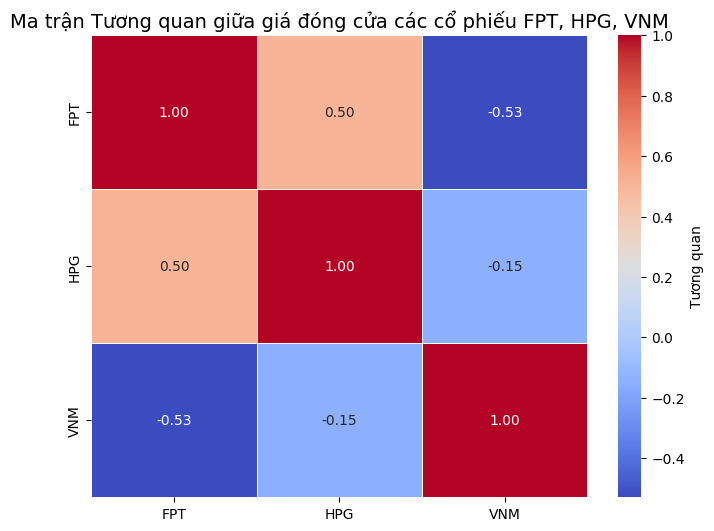

In [120]:
import seaborn as sns

# Đổi tên các cột để hiển thị ngắn gọn hơn
correlation_matrix = correlation_matrix.rename(columns={'FPT.Close': 'FPT', 'HPG.Close': 'HPG', 'VNM.Close': 'VNM'})
correlation_matrix = correlation_matrix.rename(index={'FPT.Close': 'FPT', 'HPG.Close': 'HPG', 'VNM.Close': 'VNM'})

# Vẽ heatmap thể hiện sự tương quan
plt.figure(figsize=(8, 6))  # Thiết lập kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Tương quan'})

# Thêm tiêu đề và các nhãn
plt.title('Ma trận Tương quan giữa giá đóng cửa các cổ phiếu FPT, HPG, VNM', fontsize=14)
plt.show()


**5. Ước lượng và dự báo volatility:**

**5.1. Mô hình GARCH(1,1).**

Trước khi thực hiện ước lượng mô hình GARCH(1,1) chúng ta cần đảm bảo chuỗi thời gian của mình **là dừng** (Stationarity Test) đồng thời kiểm tra sự hiện diện của **phương sai thay đổi** theo thời gian (Heteroskedasticity Test) đây là cách thực hiện:

+  Để kiểm định **tính dừng** chúng ta sẽ dùng kiểm định **ADF(Augmented Dickey-Fuller)**.

+  Để kiểm định **phương sai thay đổi** ta dùng **ARCH test** kết hợp với quan sát  biểu đồ **ACF** của chuỗi bình phương lợi suất log.





**Kiểm định tính dừng với ADF(Augmented Dickey-Fuller).**




In [121]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Danh sách các mã cần kiểm định
stock_symbols = ['FPT', 'HPG', 'VNM']

# Duyệt qua từng mã cổ phiếu
for symbol in stock_symbols:
    # Lấy chuỗi Log_Return tương ứng
    returns_series = returns_data[f'{symbol}.Log_Return'].dropna()

    # Kiểm định ADF
    adf_test = adfuller(returns_series)

    # In kết quả kiểm định
    print(f"--- Kết quả kiểm định ADF cho {symbol} ---")
    print("ADF Statistic:", adf_test[0])
    print("p-value:", adf_test[1])
    print("Critical Values:", adf_test[4])
    if adf_test[1] < 0.05:
        print(f"Kết luận: Chuỗi {symbol} dừng.\n")
    else:
        print(f"Kết luận: Chuỗi {symbol} không dừng.\n")

--- Kết quả kiểm định ADF cho FPT ---
ADF Statistic: -26.02088452588087
p-value: 0.0
Critical Values: {'1%': -3.4356048614183443, '5%': -2.8638605461891617, '10%': -2.5680054872544145}
Kết luận: Chuỗi FPT dừng.

--- Kết quả kiểm định ADF cho HPG ---
ADF Statistic: -7.740939451734366
p-value: 1.0623888488099492e-11
Critical Values: {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}
Kết luận: Chuỗi HPG dừng.

--- Kết quả kiểm định ADF cho VNM ---
ADF Statistic: -20.225975880509793
p-value: 0.0
Critical Values: {'1%': -3.4356133204636095, '5%': -2.8638642784217305, '10%': -2.5680074748794373}
Kết luận: Chuỗi VNM dừng.



=> Cả ba mã cổ phiếu đều có chuỗi thời gian của mình **là dừng** ( khí lấy log_return để tính)

**Biểu đồ ACF của chuỗi bình phương lợi suất**

--- Confidence Band và ACF cho FPT ---
Số lượng quan sát (N): 1249
Dải tin cậy 95%: ±0.0555
Dải tin cậy 95% có 22 lag là outside box, 9 lag là inside box



<Figure size 1200x600 with 0 Axes>

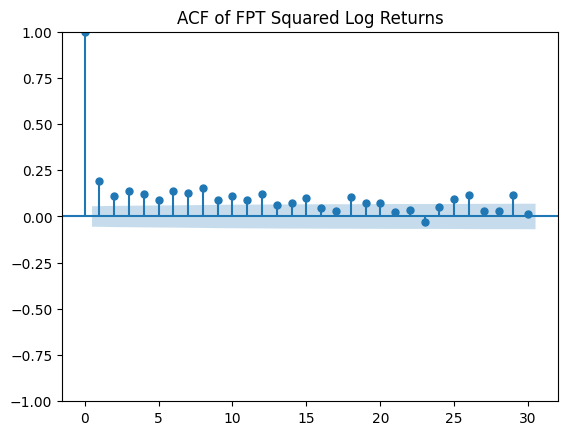

--- Confidence Band và ACF cho HPG ---
Số lượng quan sát (N): 1249
Dải tin cậy 95%: ±0.0555
Dải tin cậy 95% có 30 lag là outside box, 1 lag là inside box



<Figure size 1200x600 with 0 Axes>

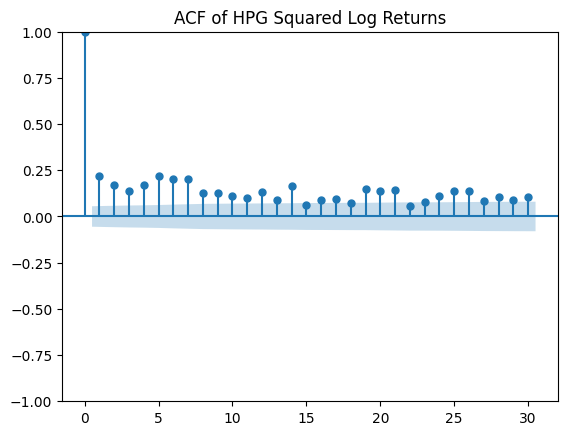

--- Confidence Band và ACF cho VNM ---
Số lượng quan sát (N): 1249
Dải tin cậy 95%: ±0.0555
Dải tin cậy 95% có 10 lag là outside box, 21 lag là inside box



<Figure size 1200x600 with 0 Axes>

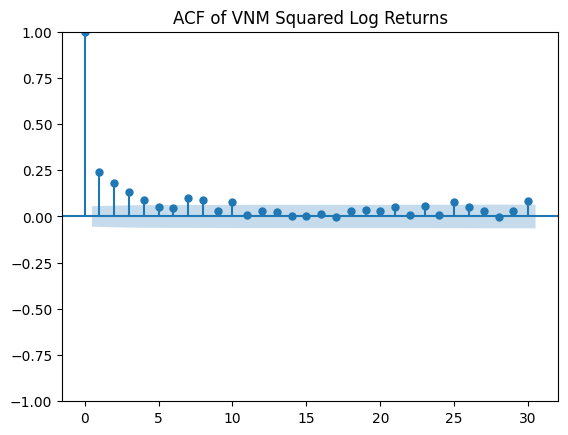

In [122]:
from statsmodels.tsa.stattools import acf

# Danh sách các mã cần kiểm định
stock_symbols = ['FPT', 'HPG', 'VNM']

# Duyệt qua từng mã cổ phiếu
for symbol in stock_symbols:
    # Lấy chuỗi Log_Return tương ứng
    returns_series = returns_data[f'{symbol}.Log_Return'].dropna()

    # Tính ACF của chuỗi bình phương lợi suất
    squared_returns_series = returns_series ** 2
    acf_values, confint_values = acf(squared_returns_series, nlags=30, alpha=0.05)

    # Tính độ dài chuỗi dữ liệu
    N = len(squared_returns_series)

    # Tính dải tin cậy 95%
    confidence_band = 1.96 / np.sqrt(N)

    # Đếm số lượng lag outside và inside
    outside_count = 0
    inside_count = 0

    # Kiểm tra các giá trị ACF và đếm số lượng outside và inside
    for acf_value in acf_values:
        if abs(acf_value) > confidence_band:
            outside_count += 1
        else:
            inside_count += 1

    # In kết quả thống kê
    print(f"--- Confidence Band và ACF cho {symbol} ---")
    print(f"Số lượng quan sát (N): {N}")
    print(f"Dải tin cậy 95%: ±{confidence_band:.4f}")
    print(f"Dải tin cậy 95% có {outside_count} lag là outside box, {inside_count} lag là inside box\n")

    # Vẽ đồ thị ACF theo kiểu ngang
    plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước cho phù hợp với biểu đồ ngang
    plot_acf(squared_returns_series, lags=30, alpha=0.05)
    plt.title(f"ACF of {symbol} Squared Log Returns")
    plt.show()

Nhận xét: Kết quả ACF của chuỗi bình phương lợi suất (log) cho thấy có sự tự tương quan mạnh mẽ tại nhiều lag bằng chứng có là nhiều điểm Outsight the box hơn là Insight the box trừ trường hợp của VNM.

**Kiểm định hiệu ứng ARCH: ARCH-LM**

In [123]:
from statsmodels.stats.diagnostic import het_arch

# Danh sách các mã cần kiểm định
stock_symbols = ['FPT', 'HPG', 'VNM']

# Duyệt qua từng mã cổ phiếu
for symbol in stock_symbols:
    # Lấy chuỗi Log_Return tương ứng
    returns_series = returns_data[f'{symbol}.Log_Return'].dropna()

    # Thực hiện kiểm định ARCH-LM
    arch_test_result = het_arch(returns_series)

    # arch_test_result trả về một tuple với nhiều giá trị
    lm_statistic = arch_test_result[0]  # Lagrange Multiplier statistic
    p_value = arch_test_result[1]       # p-value
    num_lags = arch_test_result[2]      # Số lượng lags

    # Kiểm tra kết quả kiểm định
    conclusion = "Có dấu hiệu Heteroscedasticity" if p_value < 0.05 else "Không có dấu hiệu Heteroscedasticity"

    # In kết quả kiểm định ARCH-LM
    print(f"--- Kiểm định ARCH-LM cho {symbol} ---")
    print(f"Lagrange Multiplier Statistic: {lm_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Số lags: {num_lags}")
    print(f"Kết luận: {conclusion}\n")


--- Kiểm định ARCH-LM cho FPT ---
Lagrange Multiplier Statistic: 104.7183
p-value: 0.0000
Số lags: 11.337045072227347
Kết luận: Có dấu hiệu Heteroscedasticity

--- Kiểm định ARCH-LM cho HPG ---
Lagrange Multiplier Statistic: 155.8563
p-value: 0.0000
Số lags: 17.669999214215302
Kết luận: Có dấu hiệu Heteroscedasticity

--- Kiểm định ARCH-LM cho VNM ---
Lagrange Multiplier Statistic: 111.9899
p-value: 0.0000
Số lags: 12.202517792139327
Kết luận: Có dấu hiệu Heteroscedasticity



Nhận xét:

Dựa trên kết quả kiểm định ARCH-LM, có dấu hiệu Heteroscedasticity vì vậy chạy mô hình GARCH là phù hợp.


=> Kết hợp hai yếu tố là chuỗi thời gian dừng và có sự tự tương quan mạnh mẽ trong bình phương lợi suất(log). Ta kết luận có thể sự dụng mô hình GARCH(1,1)  để mô hình hóa sự biến động này.

**Mô hình GARCH(1,1)**

In [124]:
!pip install arch
from arch import arch_model

log_return_clean_fpt = returns_data['FPT.Log_Return'].dropna()
log_return_clean_hpg = returns_data['HPG.Log_Return'].dropna()
log_return_clean_vnm = returns_data['VNM.Log_Return'].dropna()

# Tạo mô hình GARCH(1,1) cho mỗi mã cổ phiếu
garch_model_fpt = arch_model(log_return_clean_fpt, vol="GARCH", p=1, q=1)
garch_result_fpt = garch_model_fpt.fit(disp="off")

garch_model_hpg = arch_model(log_return_clean_hpg, vol="GARCH", p=1, q=1)
garch_result_hpg = garch_model_hpg.fit(disp="off")

garch_model_vnm = arch_model(log_return_clean_vnm, vol="GARCH", p=1, q=1)
garch_result_vnm = garch_model_vnm.fit(disp="off")

# Hiển thị kết quả cho từng mã cổ phiếu
print("Mô hình GARCH cho FPT:")
print(garch_result_fpt.summary())

print("\nMô hình GARCH cho HPG:")
print(garch_result_hpg.summary())

print("\nMô hình GARCH cho VNM:")
print(garch_result_vnm.summary())


y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000305. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004956. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002279. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescalin

Mô hình GARCH cho FPT:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:         FPT.Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3375.05
Distribution:                  Normal   AIC:                          -6742.10
Method:            Maximum Likelihood   BIC:                          -6721.58
                                        No. Observations:                 1249
Date:                Fri, Dec 13 2024   Df Residuals:                     1248
Time:                        04:29:38   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.2728e-03  4.393e-05   

Nhận xét:

Các tham số Omega, alpha(1) và beta(1) đều có P-value(<0.01) rất nhỏ ở cả ba cổ phiếu là VNM, FPT và HPG. Điều đó cho thấy rằng các tham số này đều có ý nghĩa thống kê rất cao trong mô hình GARCH(1,1)


**Kiểm định Ljung-Box cho phần dư của mô hình GARCH(1,1) để xem có sự tự tương quan hay không.**

In [125]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Lấy phần dư của các mô hình GARCH
residual_fpt = garch_result_fpt.resid
residual_hpg = garch_result_hpg.resid
residual_vnm = garch_result_vnm.resid

# Kiểm định Ljung-Box cho phần dư
# Giới hạn số lượng lag (ví dụ: 10 lag) có thể thay đổi tùy ý
lag = 10

# Kiểm định Ljung-Box cho phần dư của từng cổ phiếu
ljung_box_fpt = acorr_ljungbox(residual_fpt, lags=lag)
ljung_box_hpg = acorr_ljungbox(residual_hpg, lags=lag)
ljung_box_vnm = acorr_ljungbox(residual_vnm, lags=lag)

# In kết quả kiểm định
print("Ljung-Box Test cho FPT Residuals:")
print(ljung_box_fpt)

print("\nLjung-Box Test cho HPG Residuals:")
print(ljung_box_hpg)

print("\nLjung-Box Test cho VNM Residuals:")
print(ljung_box_vnm)


Ljung-Box Test cho FPT Residuals:
      lb_stat  lb_pvalue
1    1.146433   0.284297
2    5.193600   0.074512
3    6.267147   0.099312
4    7.115065   0.129931
5    7.128331   0.211270
6    7.515423   0.275796
7   12.863021   0.075517
8   13.126881   0.107558
9   13.168892   0.155112
10  13.796353   0.182485

Ljung-Box Test cho HPG Residuals:
      lb_stat  lb_pvalue
1    2.922699   0.087342
2    3.365490   0.185863
3    3.451558   0.327099
4    4.694053   0.320154
5    4.739743   0.448461
6    4.742743   0.577206
7    5.328545   0.619937
8    7.731640   0.460114
9   10.921074   0.281158
10  11.101941   0.349631

Ljung-Box Test cho VNM Residuals:
      lb_stat  lb_pvalue
1    5.086330   0.024115
2    7.926572   0.019001
3   15.372485   0.001524
4   23.387954   0.000106
5   24.576597   0.000168
6   24.777751   0.000375
7   24.907108   0.000788
8   25.351164   0.001355
9   25.354253   0.002603
10  25.375460   0.004677


Nhận xét:

+ FPT và HPG: Không có tự tương quan trong phần dư, cho thấy mô hình GARCH(1,1) đã bắt được các đặc tính động của dữ liệu và không cần điều chỉnh thêm.

+ VNM: Có sự tự tương quan trong phần dư, điều này có thể chỉ ra rằng mô hình GARCH(1,1) chưa hoàn toàn giải thích được sự biến động của dữ liệu và có thể cần phải mở rộng mô hình để cải thiện dự báo.

**So sánh với EWMA với GARCH(1,1).**

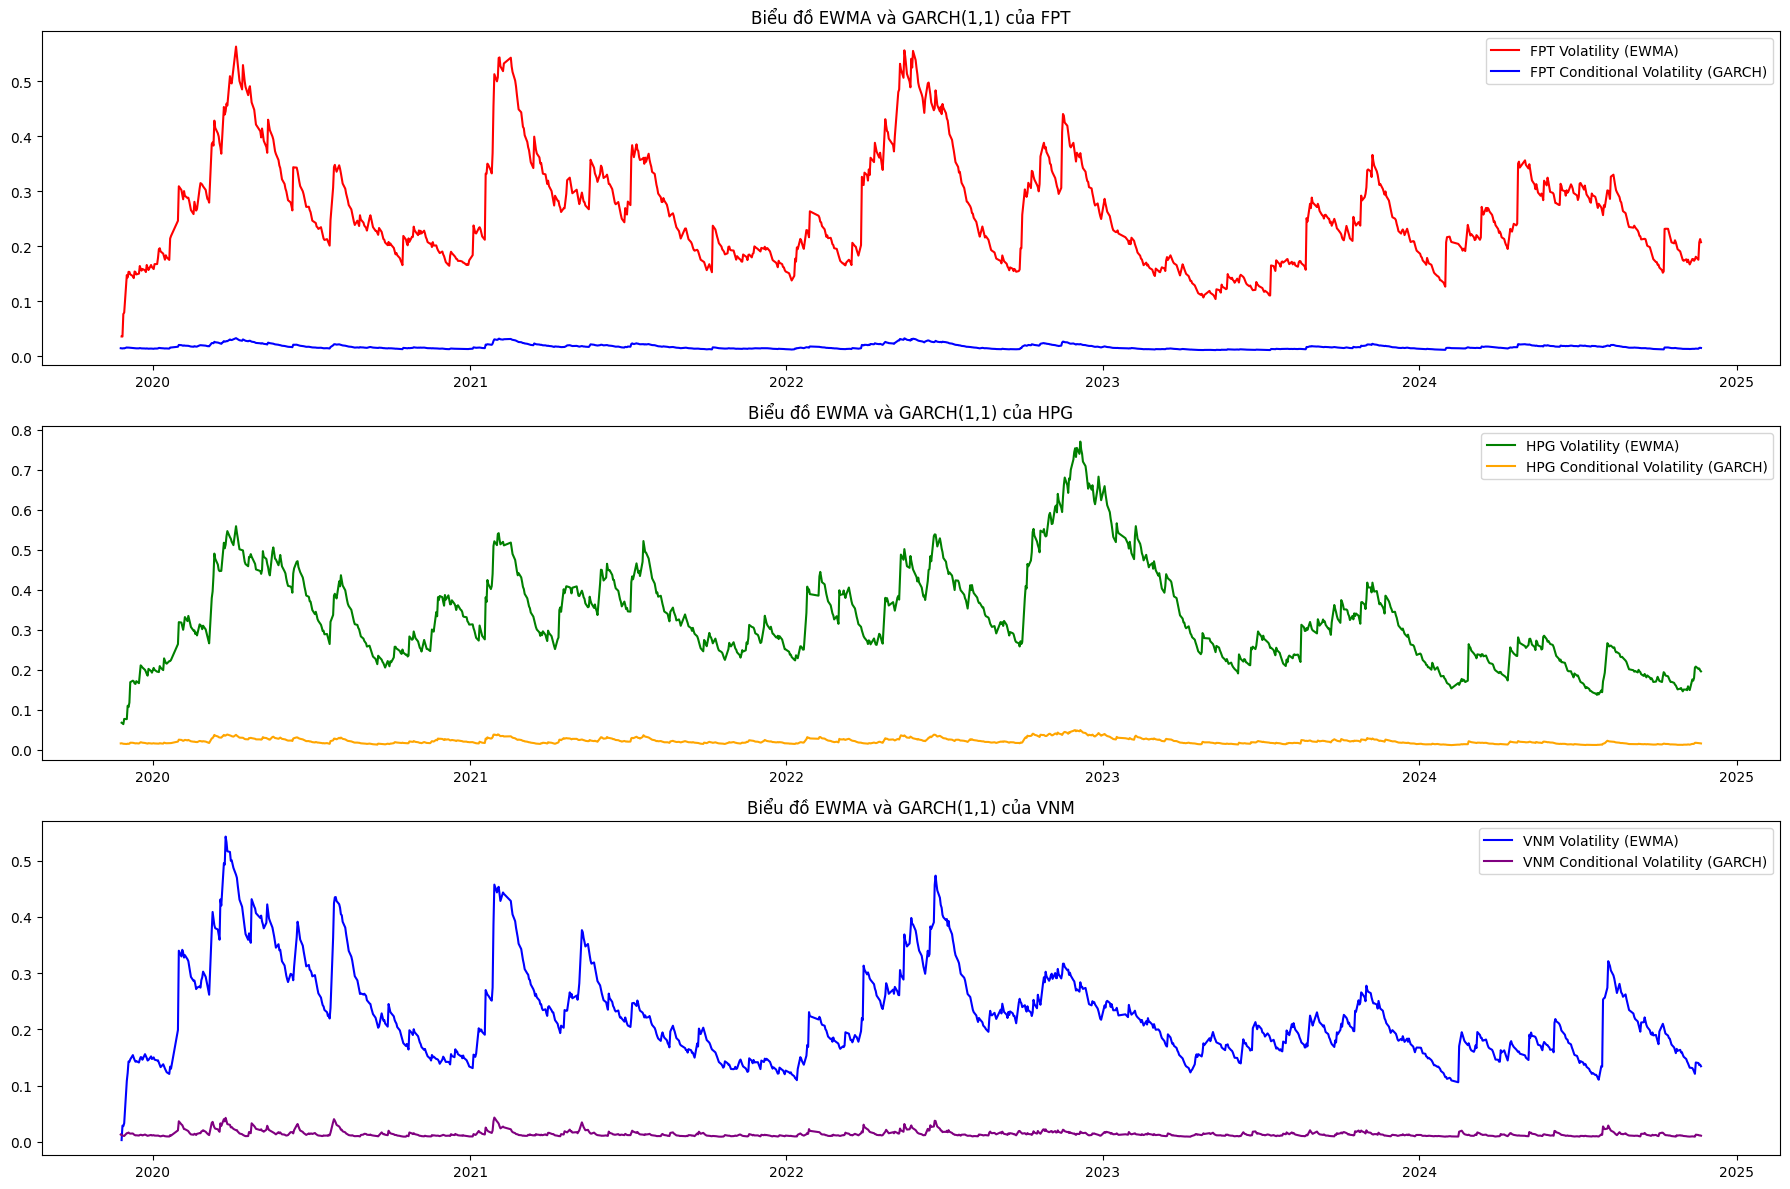

In [126]:
# Đảm bảo dữ liệu sạch
returns_data['time'] = returns_data.index
returns_data['time'] = pd.to_datetime(returns_data['time'])
returns_data_clean = returns_data.dropna()

# Đặt cột 'time' làm chỉ số cho DataFrame
returns_data.set_index('time', inplace=True)

# Tính toán EWMA cho ba mã cổ phiếu: FPT, HPG, VNM
Landa_ = 0.94  # Hệ số làm mượt (decay factor)

# Hàm tính EWMA
def calculate_ewma(log_return_data):
    sigma2 = 0
    ewma = [np.nan]  # Thêm một giá trị NaN ở đầu
    for t in range(1, len(log_return_data)):
        sigma2 = Landa_ * sigma2 + (1 - Landa_) * log_return_data.iloc[t-1]**2
        ewma.append(np.sqrt(sigma2) * np.sqrt(252))  # Annualized volatility
    ewma.append(np.nan)  # Thêm một giá trị NaN vào cuối
    return ewma

# Tính EWMA cho ba cổ phiếu
ewma_fpt = calculate_ewma(log_return_clean_fpt)
ewma_hpg = calculate_ewma(log_return_clean_hpg)
ewma_vnm = calculate_ewma(log_return_clean_vnm)

# Điều chỉnh chiều dài nếu cần thiết (thêm NaN nếu thiếu)
def adjust_length(x, y):
    if len(x) > len(y):
        y = np.append(y, np.nan)  # Thêm NaN vào cuối
    elif len(x) < len(y):
        x = np.append(x, np.nan)  # Thêm NaN vào cuối
    return x, y

# Điều chỉnh chiều dài cho mỗi cặp dữ liệu
returns_data_index_fpt, garch_volatility_fpt = adjust_length(returns_data.index, garch_result_fpt.conditional_volatility)
returns_data_index_hpg, garch_volatility_hpg = adjust_length(returns_data.index, garch_result_hpg.conditional_volatility)
returns_data_index_vnm, garch_volatility_vnm = adjust_length(returns_data.index, garch_result_vnm.conditional_volatility)

# Vẽ đồ thị cho từng mã cổ phiếu
plt.figure(figsize=(18, 12))

# Đồ thị FPT (Kết hợp EWMA và GARCH)
plt.subplot(3, 1, 1)
plt.plot(returns_data.index, ewma_fpt, label="FPT Volatility (EWMA)", color="red")
plt.plot(returns_data.index, garch_volatility_fpt, label="FPT Conditional Volatility (GARCH)", color="blue")
plt.legend()
plt.title('Biểu đồ EWMA và GARCH(1,1) của FPT')

# Đồ thị HPG (Kết hợp EWMA và GARCH)
plt.subplot(3, 1, 2)
plt.plot(returns_data.index, ewma_hpg, label="HPG Volatility (EWMA)", color="green")
plt.plot(returns_data.index, garch_volatility_hpg, label="HPG Conditional Volatility (GARCH)", color="orange")
plt.legend()
plt.title('Biểu đồ EWMA và GARCH(1,1) của HPG')

# Đồ thị VNM (Kết hợp EWMA và GARCH)
plt.subplot(3, 1, 3)
plt.plot(returns_data.index, ewma_vnm, label="VNM Volatility (EWMA)", color="blue")
plt.plot(returns_data.index, garch_volatility_vnm, label="VNM Conditional Volatility (GARCH)", color="purple")
plt.legend()
plt.title('Biểu đồ EWMA và GARCH(1,1) của VNM')

plt.tight_layout()
plt.show()


Nhận xét:

+ Đường biểu diễn của EWMA thường có các đỉnh và đáy nhọn hơn, cho thấy sự thay đổi nhanh chóng trong ước tính biến động. Điều này có thể hữu ích khi cần nắm bắt các biến động tức thời của thị trường.

+ Đường biểu diễn của GARCH(1,1) mượt mà hơn, thể hiện sự trung bình hóa các cú sốc trong quá khứ. Mô hình này có thể phù hợp hơn khi cần một cái nhìn tổng quan về biến động dài hạn.

**Dự báo volatility 10 ngày tới bằng GARCH(1,1)**

In [127]:
from datetime import datetime, timedelta

# Ngày bắt đầu dự báo
start_date = datetime.strptime("2024-11-24", "%Y-%m-%d")

# Dự báo volatility trong 10 ngày tới
forecast_horizon = 10

# Dự báo cho FPT
forecast_fpt = garch_result_fpt.forecast(horizon=forecast_horizon)
cond_variances_fpt = forecast_fpt.variance.iloc[-1]
volatility_forecast_fpt = np.sqrt(cond_variances_fpt)

# Dự báo cho HPG
forecast_hpg = garch_result_hpg.forecast(horizon=forecast_horizon)
cond_variances_hpg = forecast_hpg.variance.iloc[-1]
volatility_forecast_hpg = np.sqrt(cond_variances_hpg)

# Dự báo cho VNM
forecast_vnm = garch_result_vnm.forecast(horizon=forecast_horizon)
cond_variances_vnm = forecast_vnm.variance.iloc[-1]
volatility_forecast_vnm = np.sqrt(cond_variances_vnm)

# Hiển thị kết quả với ngày cụ thể
print(f"{'Ngày':<12}{'FPT':<12}{'HPG':<12}{'VNM':<12}")
for i in range(forecast_horizon):
    forecast_date = (start_date + timedelta(days=i)).strftime('%Y-%m-%d')  # Tính ngày dự báo
    print(f"{forecast_date:<12}{volatility_forecast_fpt[i]:<12.5f}{volatility_forecast_hpg[i]:<12.5f}{volatility_forecast_vnm[i]:<12.5f}")

Ngày        FPT         HPG         VNM         
2024-11-24  0.01440     0.01483     0.01097     
2024-11-25  0.01447     0.01502     0.01152     
2024-11-26  0.01453     0.01520     0.01200     
2024-11-27  0.01460     0.01537     0.01241     
2024-11-28  0.01466     0.01554     0.01277     
2024-11-29  0.01472     0.01570     0.01309     
2024-11-30  0.01478     0.01586     0.01337     
2024-12-01  0.01484     0.01601     0.01362     
2024-12-02  0.01490     0.01616     0.01383     
2024-12-03  0.01495     0.01631     0.01403     


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


**Biểu đồ Volatility Clustering**

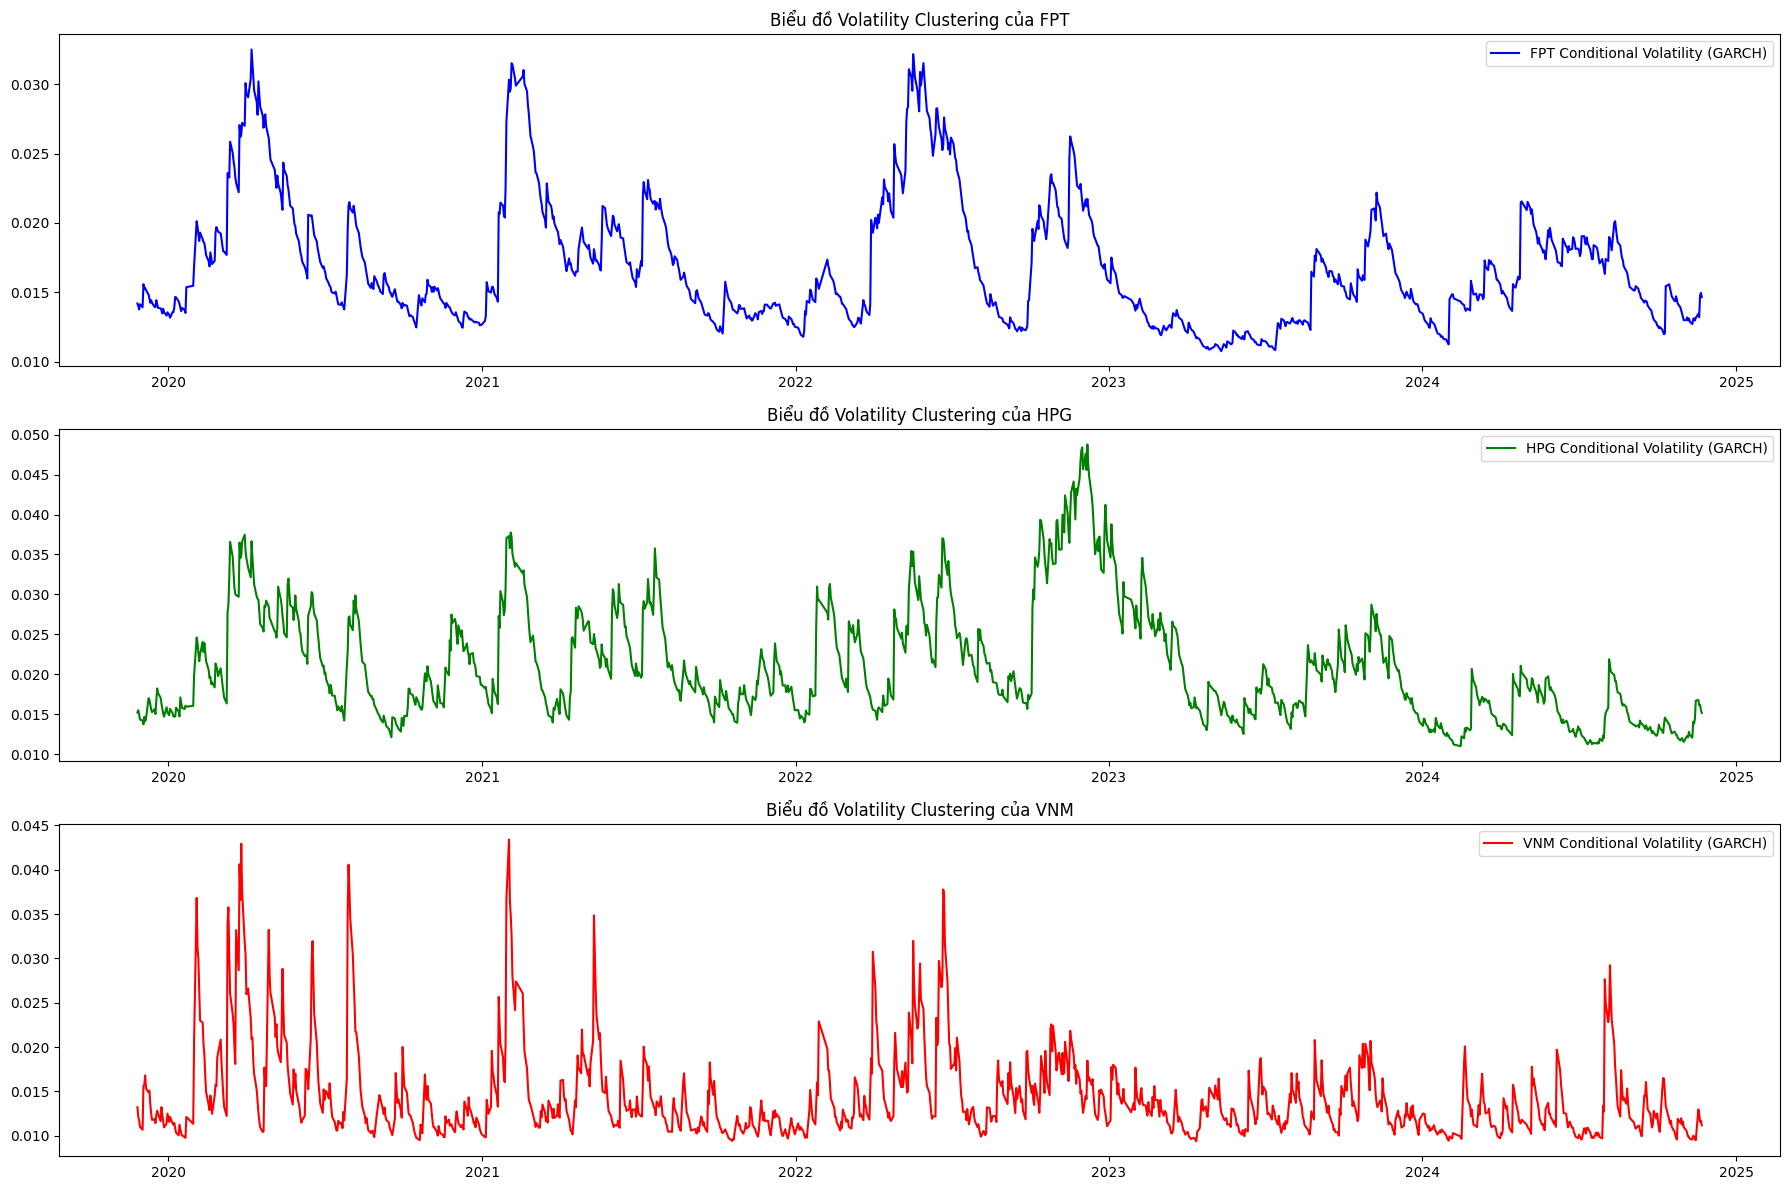

In [128]:
# Lấy kết quả phương sai điều kiện (conditional volatility) cho mỗi mã cổ phiếu
data_garch_fpt = garch_result_fpt.conditional_volatility
data_garch_hpg = garch_result_hpg.conditional_volatility
data_garch_vnm = garch_result_vnm.conditional_volatility

# Vẽ đồ thị cho từng mã cổ phiếu
plt.figure(figsize=(18, 12))

# Đồ thị FPT
plt.subplot(3, 1, 1)
plt.plot(data_garch_fpt, label="FPT Conditional Volatility (GARCH)", color="blue")
plt.legend()
plt.title('Biểu đồ Volatility Clustering của FPT')

# Đồ thị HPG
plt.subplot(3, 1, 2)
plt.plot(data_garch_hpg, label="HPG Conditional Volatility (GARCH)", color="green")
plt.legend()
plt.title('Biểu đồ Volatility Clustering của HPG')

# Đồ thị VNM
plt.subplot(3, 1, 3)
plt.plot(data_garch_vnm, label="VNM Conditional Volatility (GARCH)", color="red")
plt.legend()
plt.title('Biểu đồ Volatility Clustering của VNM')

plt.tight_layout()
plt.show()


**Mở rộng: Mô hình GJR-GARCH.**

Lý do: Dữ liệu được lấy từ ngày 25/11/2019 đến ngày 25/11/2024 thời điểm mà thế giới bắt đầu có rất nhiều khủng hoảng và trải qua rất nhiều sự kiện tiêu cực. Có thể kể đến:
+ Đại dịch COVID-19

+ Chiến tranh Nga-Ukraine.

+ Lũ lụt và thiên tai: Bão Yagi(bão số 3), siêu bão Noru,...

=> Những sự kiện này thường gây ra cú sốc tiêu cực lớn và có thể được mô hình hóa trong các mô hình GJR-GARCH để nắm bắt sự phản ứng mạnh mẽ của thị trường.


In [129]:
# Tạo mô hình GJR-GARCH cho từng cổ phiếu
gjr_garch_model_fpt = arch_model(log_return_clean_fpt, vol="GARCH", p=1, q=1, o=1)
gjr_garch_result_fpt = gjr_garch_model_fpt.fit(disp="off")

gjr_garch_model_hpg = arch_model(log_return_clean_hpg, vol="GARCH", p=1, q=1, o=1)
gjr_garch_result_hpg = gjr_garch_model_hpg.fit(disp="off")

gjr_garch_model_vnm = arch_model(log_return_clean_vnm, vol="GARCH", p=1, q=1, o=1)
gjr_garch_result_vnm = gjr_garch_model_vnm.fit(disp="off")

# Hiển thị kết quả cho từng mô hình GJR-GARCH
print("Mô hình GJR-GARCH cho FPT:")
print(gjr_garch_result_fpt.summary())

print("\nMô hình GJR-GARCH cho HPG:")
print(gjr_garch_result_hpg.summary())

print("\nMô hình GJR-GARCH cho VNM:")
print(gjr_garch_result_vnm.summary())


y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000305. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004956. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002279. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescalin

Mô hình GJR-GARCH cho FPT:
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:         FPT.Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                3380.82
Distribution:                  Normal   AIC:                          -6751.63
Method:            Maximum Likelihood   BIC:                          -6725.98
                                        No. Observations:                 1249
Date:                Fri, Dec 13 2024   Df Residuals:                     1248
Time:                        04:30:03   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.1482e-03  5.038e-0

Nhận xét:

+ Chỉ số gamma của ba mã cổ phiếu FPT, HPG và VNM lần lượt là 0.05, 0.05 và 0.2 đều dương cho thấy tin xấu tác động mạnh hơn so với tin tốt.

+ Với FPT và HPG, giá trị gamma bằng 0.05 cho thấy mức độ phản ứng tương đối thấp đối với tin xấu, nhưng vẫn mạnh hơn so với tin tốt, nghĩa là các cổ phiếu này có một độ nhạy vừa phải đối với tin xấu.

+ Với VNM, giá trị 0.2 cao hơn, cho thấy cổ phiếu này có độ nhạy cao hơn đối với tin xấu, phản ánh mức độ lo ngại hoặc hoảng loạn mạnh hơn so với FPT và HPG khi có thông tin xấu.

**6. Xây dựng danh mục đầu tư**

**6.1. Tối ưu danh mục theo Markowitz**

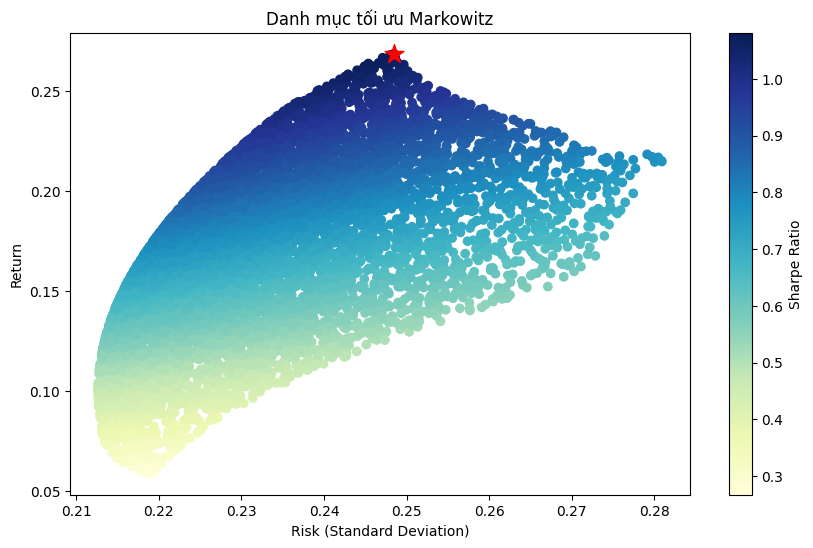

Danh mục tối ưu với tỷ lệ Sharpe cao nhất:
Tỉ suất sinh lời kỳ vọng hàng năm: 0.2687
Tỷ trọng của các cổ phiếu trong danh mục tối ưu:
FPT: 0.6425
HPG: 0.2547
VNM: 0.1028


In [130]:
# Thiết lập seed để đảm bảo kết quả ngẫu nhiên cố định
np.random.seed(15)

log_returns_clean = log_returns.dropna()

# Tính toán lợi suất trung bình hàng ngày (mean returns)
mean_returns = log_returns_clean.mean()

# Tính toán ma trận phương sai - hiệp phương sai giữa các cổ phiếu
cov_matrix = log_returns_clean.cov()

# Số lượng cổ phiếu
num_assets = len(mean_returns)

# Số ngày giao dịch trong một năm
trading_days_per_year = 250

# Thiết lập số lượng danh mục ngẫu nhiên để tạo ra nhiều danh mục và tìm kiếm danh mục tối ưu
num_portfolios = 7500

# Khởi tạo mảng lưu trữ kết quả
results = np.zeros((3, num_portfolios))
weights_array = np.zeros((num_assets, num_portfolios))  # Mảng để lưu trữ tỷ trọng của từng cổ phiếu

for i in range(num_portfolios):
    # Sinh ngẫu nhiên tỷ trọng cho các cổ phiếu trong danh mục, đảm bảo tổng tỷ trọng = 1
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Đảm bảo tổng tỷ trọng = 1

    # Đảm bảo tỷ trọng của từng cổ phiếu nằm trong khoảng 10% đến 65%
    while (weights < 0.1).any() or (weights > 0.65).any():
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

    # Tính toán lợi suất danh mục và độ lệch chuẩn danh mục
    portfolio_return = np.sum(weights * mean_returns) * trading_days_per_year  # Lợi suất hàng năm
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(trading_days_per_year)  # Rủi ro hàng năm

    # Lưu trữ kết quả vào mảng results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Tính tỷ lệ Sharpe

    # Lưu tỷ trọng của các cổ phiếu vào mảng weights_array
    weights_array[:, i] = weights

# Chuyển kết quả thành DataFrame để dễ dàng xử lý và phân tích
results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe'])

# Tìm danh mục có tỷ lệ Sharpe cao nhất
max_sharpe_idx = results_df['Sharpe'].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]

# Tỷ trọng của các cổ phiếu trong danh mục tối ưu
optimal_weights = weights_array[:, max_sharpe_idx]

# Vẽ đồ thị biểu diễn các danh mục đầu tư
plt.figure(figsize=(10, 6))
plt.scatter(results_df.Risk, results_df.Return, c=results_df.Sharpe, cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Danh mục tối ưu Markowitz')

# Vẽ danh mục tối ưu
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', marker='*', s=200)
plt.show()

# In kết quả danh mục tối ưu
print("Danh mục tối ưu với tỷ lệ Sharpe cao nhất:")
print(f"Tỉ suất sinh lời kỳ vọng hàng năm: {max_sharpe_portfolio['Return']:.4f}")
print("Tỷ trọng của các cổ phiếu trong danh mục tối ưu:")
for i, ticker in enumerate(mean_returns.index):
    # Tách mã cổ phiếu từ chuỗi 'FPT.Log_Return'
    ticker_code = ticker.split('.')[0]
    print(f"{ticker_code}: {optimal_weights[i]:.4f}")


Nhận xét:

Danh mục tối ưu với lợi suất kỳ vọng hàng năm là 26.87%. Tỷ trọng lớn nhất thuộc về FPT (64.25%), cho thấy cổ phiếu này có khả năng mang lại lợi suất cao nhưng đi kèm rủi ro lớn. HPG (25.47%) và VNM (10.28%) giúp giảm thiểu rủi ro và ổn định lợi suất tổng thể.

**Điều chỉnh danh mục theo khẩu vị rủi ro**

Bạn lựa chọn tỉ suất sinh lợi mong muốn và máy sẽ hiện tỉ trọng cũng như rủi ro tương ứng với tỉ suất sinh lời đó.

In [131]:
import ipywidgets as widgets
from IPython.display import display

# Khởi tạo mảng lưu trữ kết quả
results = np.zeros((3, num_portfolios))
weights_array = np.zeros((num_assets, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    while (weights < 0.1).any() or (weights > 0.65).any():
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

    portfolio_return = np.sum(weights * mean_returns) * trading_days_per_year
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(trading_days_per_year)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev
    weights_array[:, i] = weights

# Chuyển kết quả thành DataFrame để dễ dàng xử lý
results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe'])

# Tạo hàm tương tác
def adjust_return(return_target):
    # Tìm danh mục có mức lợi suất gần với giá trị mục tiêu
    closest_idx = (results_df['Return'] - return_target).abs().idxmin()
    selected_portfolio = results_df.iloc[closest_idx]
    optimal_weights = weights_array[:, closest_idx]

    # Hiển thị thông tin danh mục
    with output:
        output.clear_output()  # Xóa kết quả cũ
        print(f"\n--- Danh mục phù hợp với lợi suất mục tiêu {return_target:.2f} ---")
        print(f"Lợi suất kỳ vọng hàng năm: {selected_portfolio['Return']:.4f}")
        print(f"Rủi ro(độ lệch chuẩn): {selected_portfolio['Risk']:.4f}")
        print("Tỷ trọng các cổ phiếu:")
        for i, ticker in enumerate(mean_returns.index):
            ticker_code = ticker.split('.')[0]
            print(f"{ticker_code}: {optimal_weights[i]:.4f}")

# Tạo slider để người dùng điều chỉnh mức lợi suất kỳ vọng mong muốn
return_slider = widgets.FloatSlider(
    value=results_df['Return'].mean(),
    min=results_df['Return'].min(),
    max=results_df['Return'].max(),
    step=0.01,
    description='Lợi suất:',
    continuous_update=False
)

# Kết nối slider với hàm
output = widgets.Output()

def on_slider_change(change):
    adjust_return(change['new'])

return_slider.observe(on_slider_change, names='value')
display(return_slider, output)

FloatSlider(value=0.16735594517549404, continuous_update=False, description='Lợi suất:', max=0.267683353821885…

Output()

**Tính toán VaR cho danh mục** ( Theo phương pháp HS)

In [ ]:
# Tính lợi suất danh mục hàng ngày dựa trên danh mục tối ưu
portfolio_daily_returns = log_returns_clean.dot(optimal_weights)

# Sắp xếp lợi suất danh mục theo thứ tự tăng dần
sorted_returns = portfolio_daily_returns.sort_values()

# Xác định mức độ tin cậy (ví dụ: 95%)
confidence_level = 0.95

# Tìm giá trị VaR tại mức tin cậy 95%
var_daily = -np.percentile(sorted_returns, (1 - confidence_level) * 100)

# Chuyển đổi VaR sang hàng năm
var_annualized = var_daily * np.sqrt(trading_days_per_year)

# In kết quả VaR
print(f"VaR hàng ngày tại mức độ tin cậy {confidence_level*100}%: {var_daily:.4f}")
print(f"VaR hàng năm tại mức độ tin cậy {confidence_level*100}%: {var_annualized:.4f}")


VaR hàng ngày tại mức độ tin cậy 95.0%: 0.0233
VaR hàng năm tại mức độ tin cậy 95.0%: 0.3685


**Phân tích kịch bản (Scenario Analysis)**

Kịch bản 1: Thị trường xấu, giá của mã cổ phiếu FPT giảm mất từ 20% đến 30% giá trị

In [132]:
# Tỷ trọng của các cổ phiếu trong danh mục tối ưu
weights = {"FPT": 0.6425, "HPG": 0.2547, "VNM": 0.1028}

# Giá cổ phiếu ngày 22-11-2024
prices_2024 = {"FPT": 132.98, "HPG": 26.10, "VNM": 64.30}

# Hệ số tương quan giữa các cổ phiếu
correlation = {"FPT-HPG": 0.504951, "FPT-VNM": -0.529144}

# Hàm tính tỉ suất sinh lời kỳ vọng
def calculate_expected_return(delta_FPT):
    # Tính mức giảm của HPG và VNM dựa vào tương quan với FPT
    delta_HPG = correlation["FPT-HPG"] * delta_FPT
    delta_VNM = correlation["FPT-VNM"] * delta_FPT

    # Tính giá mới sau khi giảm
    prices_new = {
        "FPT": prices_2024["FPT"] * (1 + delta_FPT),
        "HPG": prices_2024["HPG"] * (1 + delta_HPG),
        "VNM": prices_2024["VNM"] * (1 + delta_VNM),
    }

    # Tính giá trị danh mục ban đầu (22-11-2024)
    V_2024 = sum(weights[stock] * prices_2024[stock] for stock in weights)

    # Tính giá trị danh mục sau điều chỉnh (22-11-2025)
    V_2025_new = sum(weights[stock] * prices_new[stock] for stock in weights)

    # Tính tỉ suất sinh lời kỳ vọng
    return (V_2025_new / V_2024) - 1

# Trường hợp 1: FPT giảm 20%
expected_return_20 = calculate_expected_return(-0.20)
print(f"Tỉ suất sinh lời kỳ vọng (FPT giảm 20%): {expected_return_20 * 100:.2f}%")

# Trường hợp 2: FPT giảm 30%
expected_return_30 = calculate_expected_return(-0.30)
print(f"Tỉ suất sinh lời kỳ vọng (FPT giảm 30%): {expected_return_30 * 100:.2f}%")


Tỉ suất sinh lời kỳ vọng (FPT giảm 20%): -17.28%
Tỉ suất sinh lời kỳ vọng (FPT giảm 30%): -25.93%


Nhận xét:

+ Vì FPT là cổ phiếu có tỉ trọng cao nhất trong danh mục nên tôi sẽ tập trung vào mức độ tăng/giảm của mã cổ phiếu này.

+ Ở kịch bản thị trường xấu, nếu FPT giảm mất 20% đến 30% giá trị chúng ta sẽ có mức lỗ từ 17,28% đến 25,93% tổng danh mục đầu tư. Nếu chúng ta e ngại kịch bản này chúng ta có thể điều chính tỉ trọng các mã cổ phiếu để giảm mức lỗ có thể gây ra.

Kịch bản 2: Thị trường bình thường, giá của mã cổ phiếu FPT tăng 10% đến 20%

In [133]:
# Trường hợp 1: FPT tăng 10%
expected_return_10 = calculate_expected_return(0.10)
print(f"Tỉ suất sinh lời kỳ vọng (FPT tăng 10%): {expected_return_10 * 100:.2f}%")

# Trường hợp 2: FPT tăng 20%
expected_return_20 = calculate_expected_return(0.20)
print(f"Tỉ suất sinh lời kỳ vọng (FPT tăng 20%): {expected_return_20 * 100:.2f}%")



Tỉ suất sinh lời kỳ vọng (FPT tăng 10%): 8.64%
Tỉ suất sinh lời kỳ vọng (FPT tăng 20%): 17.28%


Nhận xét:

Đối với kịch bản thị trường bình thường, cổ phiếu FPT tăng từ 10% đến 20% và chúng ta sẽ nhận được tỉ suất sinh lợi kì vọng từ 8.64% đến 17.28%.

Kịch bản 3: Thị trường tăng, giá của mã cổ phiếu FPT tăng vọt từ 30% đến 40%

In [134]:
# Trường hợp 1: FPT tăng 10%
expected_return_10 = calculate_expected_return(0.30)
print(f"Tỉ suất sinh lời kỳ vọng (FPT tăng 10%): {expected_return_10 * 100:.2f}%")

# Trường hợp 2: FPT tăng 20%
expected_return_20 = calculate_expected_return(0.40)
print(f"Tỉ suất sinh lời kỳ vọng (FPT tăng 20%): {expected_return_20 * 100:.2f}%")


Tỉ suất sinh lời kỳ vọng (FPT tăng 10%): 25.93%
Tỉ suất sinh lời kỳ vọng (FPT tăng 20%): 34.57%


Nhận xét:

Đây là trường hợp mà các nhà đầu tư thích nhất. Ở trong quá khứ FPT cũng đã có những năm mà giá cổ phiếu tăng trưởng mạnh như vậy, đây là lợi suất đơn giản theo năm trong 4 năm vừa qua của FPT năm 2020 là 20%, năm 2021 là 81%, năm 2022 là 0.75%, năm 2023 là 41% và năm 2024 là 61.6%. Có thể thấy trong 4 năm gần nhất thì có 3 năm mà tỉ suất sinh lợi của FPT là trên 40%.

=> Sau khi phân tích các kịch bản là thị trường giảm, bình thường hay tăng trưởng thì các nhà đầu tư có thể linh hoạt theo khẩu vị rủi ro của mình mà điều chỉnh tỉ trọng các danh mục cổ phiếu để phù hợp với bản thân mình nhất.

**Mở rộng:** Tính beta của các mã cổ phiếu so với beta thị trường.
( Vì các mã cổ phiếu ở Việt Nam nên tôi sẽ chọn beta thị trường là chỉ số VN-100)


Thu thập dữ liệu VN-100 từ ngày 21-07-2020 đến ngày 23-11-2024 ( Gói VnStock3 chỉ hỗ trợ từ ngày này)





In [135]:
# Mã chỉ số VN-100 (giả sử mã là 'VN100')
symbol = 'FUEVN100'

# Lấy dữ liệu lịch sử cho VN-100
stock = Vnstock()
vn100 = stock.stock(symbol=symbol, source='VCI').quote.history(start='2020-07-21', end='2024-11-23', interval='1D')

# Chuyển đổi cột 'time' thành định dạng DateTime
vn100['time'] = pd.to_datetime(vn100['time'])

# Chỉ lấy cột 'time' và 'close', đổi tên cột 'close' thành tên mã chỉ số
vn100 = vn100[['time', 'close']].rename(columns={'close': f'{symbol}.Close'})

# Đặt cột 'time' làm index
vn100 = vn100.set_index('time')

# Tính tỷ suất sinh lợi log (log return) sử dụng numpy
vn100[f'{symbol}.LogReturn'] = np.log(vn100[f'{symbol}.Close'] / vn100[f'{symbol}.Close'].shift(1))

# Hiển thị dữ liệu kết quả
vn100


2024-12-13 04:30:35 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,FUEVN100.Close,FUEVN100.LogReturn
time,,
2020-07-21,12.54,NaN
2020-07-22,13.41,0.067077
2020-07-23,12.50,-0.070272
2020-07-24,13.37,0.067285
2020-07-27,12.44,-0.072096
...,...,...
2024-11-18,17.13,0.000584
2024-11-19,16.91,-0.012926
2024-11-20,17.00,0.005308


Beta của ba cổ phiếu VNM, FPT và HPG

In [136]:
# Hợp nhất dữ liệu dựa trên cột ngày (index)
merged_data = vn100.join(log_returns, how='inner')

# Lọc bỏ các dòng có giá trị NaN
merged_data_clean = merged_data.dropna()

# Hàm tính Beta
def calculate_beta(stock_returns, market_returns):
    # Tính hiệp phương sai
    covariance = np.cov(stock_returns, market_returns)[0][1]
    # Tính phương sai của thị trường
    market_variance = np.var(market_returns)
    # Tính beta
    beta = covariance / market_variance
    return beta

# Tính Beta cho từng cổ phiếu
beta_fpt = calculate_beta(merged_data_clean['FPT.Log_Return'], merged_data_clean['FUEVN100.LogReturn'])
beta_vnm = calculate_beta(merged_data_clean['VNM.Log_Return'], merged_data_clean['FUEVN100.LogReturn'])
beta_hpg = calculate_beta(merged_data_clean['HPG.Log_Return'], merged_data_clean['FUEVN100.LogReturn'])

# In kết quả Beta
print(f"Beta của FPT so với VN100: {beta_fpt}")
print(f"Beta của VNM so với VN100: {beta_vnm}")
print(f"Beta của HPG so với VN100: {beta_hpg}")


Beta của FPT so với VN100: 0.3394203619999498
Beta của VNM so với VN100: 0.22748178933696578
Beta của HPG so với VN100: 0.5499113050850816


Nhận xét:

+ Cả ba mã cổ phiếu là FPT, VNM và HPG đều có **beta<1** điều đó cho thấy rằng biến động của ba mã cổ phiếu này đều thấp hơn biến động của thị trường Việt Nam.

+ Cố phiếu HPG có biến động cùng với thị trường nhiều hơn là FPT và VNM. Nên nhà đầu tư muốn giảm thiểu **"rủi ro hệ thống"** cho danh mục có thể tăng tỉ trọng của hai mã cổ phiếu là VNM và FPT đồng thời giảm mã HPG xuống.

**Đề xuất chiến lược quản trị rủi ro**

1. Đa dạng hóa danh mục:

+ Chiến lược: Tiếp tục duy trì tỷ trọng hiện tại, nhưng có thể tăng tỷ trọng vào VNM trong trường hợp thị trường xấu (FPT giảm 20% hoặc 30%), vì VNM có tương quan âm với FPT.

2. Quản lý rủi ro với VaR (Value at Risk):

+ Dựa trên mức VaR hàng ngày của các cổ phiếu theo phương pháp HS:

 +  FPT: VaR = -2.46%

 + HPG: VaR = -3.76%

 + VNM: VaR = -2.24%

+ Chiến lược: Thiết lập stop-loss cho mỗi cổ phiếu sao cho mức tổn thất tối đa không vượt quá VaR đã xác định. Điều này giúp giảm thiểu rủi ro trong trường hợp biến động lớn và bảo vệ danh mục khỏi các tổn thất không kiểm soát được trong một ngày giao dịch.

3. Theo dõi thường xuyên và điều chỉnh danh mục

+ Giám sát các thay đổi trong VaR và ES: VaR và ES không phải là các chỉ số cố định, chúng thay đổi theo sự biến động của thị trường. Do đó, việc theo dõi và điều chỉnh danh mục đầu tư theo thời gian là rất quan trọng.

+ Chiến lược: Sử dụng các công cụ phân tích như VaR và ES mỗi ba và sáu tháng để theo dõi rủi ro và thực hiện điều chỉnh khi cần thiết.

4. Phòng ngừa rủi ro với các công cụ phái sinh tại thị trường Việt Nam.

+ Hợp đồng tương lai (Futures contracts) là một công cụ phái sinh phổ biến tại thị trường Việt Nam, cho phép các nhà đầu tư cam kết mua hoặc bán một tài sản (như cổ phiếu hoặc chỉ số) tại một thời điểm xác định trong tương lai với mức giá đã thỏa thuận.

+ Để phòng ngừa rủi ro, nhà đầu tư có thể sử dụng hợp đồng tương lai chỉ số VN30 để bảo vệ danh mục đầu tư của mình trước biến động lớn của thị trường. Ví dụ, khi dự báo thị trường sẽ giảm, nhà đầu tư có thể bán hợp đồng tương lai chỉ số VN30 để giảm thiểu thiệt hại khi các cổ phiếu trong danh mục như FPT, HPG hoặc VNM giảm giá.


**4. Kết luận**



+ Bài nghiên cứu này đã thực hiện nhằm xây dựng và quản lý danh mục đầu tư hiệu quả trên thị trường chứng khoán Việt Nam, đặc biệt từ 3 mã cổ phiếu trong nhóm VN30 là các mã FPT, HPG và VNM.

+ Kết quả mô hình GARCH(1,1) là phù hợp, FPT thể hiện sự ổn định với mức độ biến động thấp (alpha gần 0.05 và beta cao gần 0.93) cho thấy khả năng kiểm soát rủi ro tốt và sự ổn định trong dài hạn. HPG có mức độ biến động tương đối cao với alpha là 0.10 và beta là 0.88, VNM có sự phản ứng mạnh với biến động ngắn hạn (alpha là 0.20 và beta là 0.70) tuy nhiên vẫn duy trì khả năng phục hồi và điều chỉnh tốt. Qua đó cho thấy FPT phù hợp với những ai tìm kiếm sự an toàn, trong khi HPG và VNM là sự lựa chọn dành cho những nhà đầu tư có khẩu vị rủi ro cao hơn.

+ Kết quả mô hình GJR-GARCH(1,1) cho thấy tin xấu có tác động mạnh hơn so với tin tốt. Đối với FPT và HPG là 5% còn đối với VNM là 20%.

+ Bài nghiên cứu còn phân tích các kịch bản thị trường xấu, thường và tốt để các nhà đầu tư có thêm góc nhìn về các tình huống từ đó đưa ra lựa chọn phù hợp nhất.




**Tài liệu tham khảo**

1. Phạm Chí Khoa, “Dự báo biến động giá chứng khoán qua mô hình ARCH - GARCH”, (2017), Tạp chí Tài chính, kỳ 2, số 6, trang 38-39.

2. Phạm Thị Nga, “Hợp đồng tương lai trên chỉ số VN30 - công cụ phái sinh đầu tiên trên thị trường chứng khoán Việt Nam”, (2020), Tạp chí Khoa học công nghệ giao thông vận tải, số 35 - 02/2020, trang 91-95.

3. Phạm Trọng Nghĩa, “Tác động của việc triển khai thị trường chứng khoán phái sinh lên độ biến động chỉ số cơ sở VN30 tại Việt Nam”, (2021), Đại học Kinh tế Thành phố Hồ Chí Minh.

4. Trần Quang Huy, “Ứng dụng mô hình ARIMA - GARCH trong dự báo tỷ suất sinh lợi của danh mục đầu tư hiệu quả”, (2015), Khóa luận Đại học Kinh tế Huế.

5. Hồ Thủy Tiên, Hồ Thu Hoài, Ngô Văn Toàn. Mô hình hóa biến động thị trường chứng khoán: Thực nghiệm từ Việt Nam. (2017). Tạp chí Khoa học ĐHQGHN: Kinh tế và Kinh doanh, Tập 33, Số 3 (2017) 1-11

6. Lê Văn Tuấn, Phùng Duy Quang. Áp dụng mô hình GARCH dự báo ảnh hưởng của đại dịch Covid19 đến thị trường chứng khoán Việt Nam. (2020).

7. Vương Quân Hoàng. (2004). Hiệu ứng GARCH trên dãy lợi suất thị trường chứng khoán Việt Nam 2000-2003. Tạp chí Ứng dụng toán học, II (1), 15-30.